In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn_modelling.csv")

### This dataset contains 14 features for about 10K customers of a bank of which 20% of them are churn customers. This dataset can be used for predicting customer churn. We can build a machine learning model to predict if a customer will quit the service of the bank in the next 6 months or not. Predicting customer churn will help banks develop retention compaign and loyalty programs to retain customers.

### Reading the dataset.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking info of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### We will check for null and duplicated value.

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### There is no null as well as duplicate value in dataframe.

### EDA

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### We will check corelation between the variable.

In [8]:
df.select_dtypes(['int64','float64']).corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### From above information CustomerId and HasCrCard are low corelated to target column, but as per domain knowledge HasCrCard is important variable for banking so we can keep HasCrCard and can drop CustomerId column as well RowNumber and Surname column because these are least important column and also do not having any effect on target column.

In [9]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Countplot for various column of Dataframe

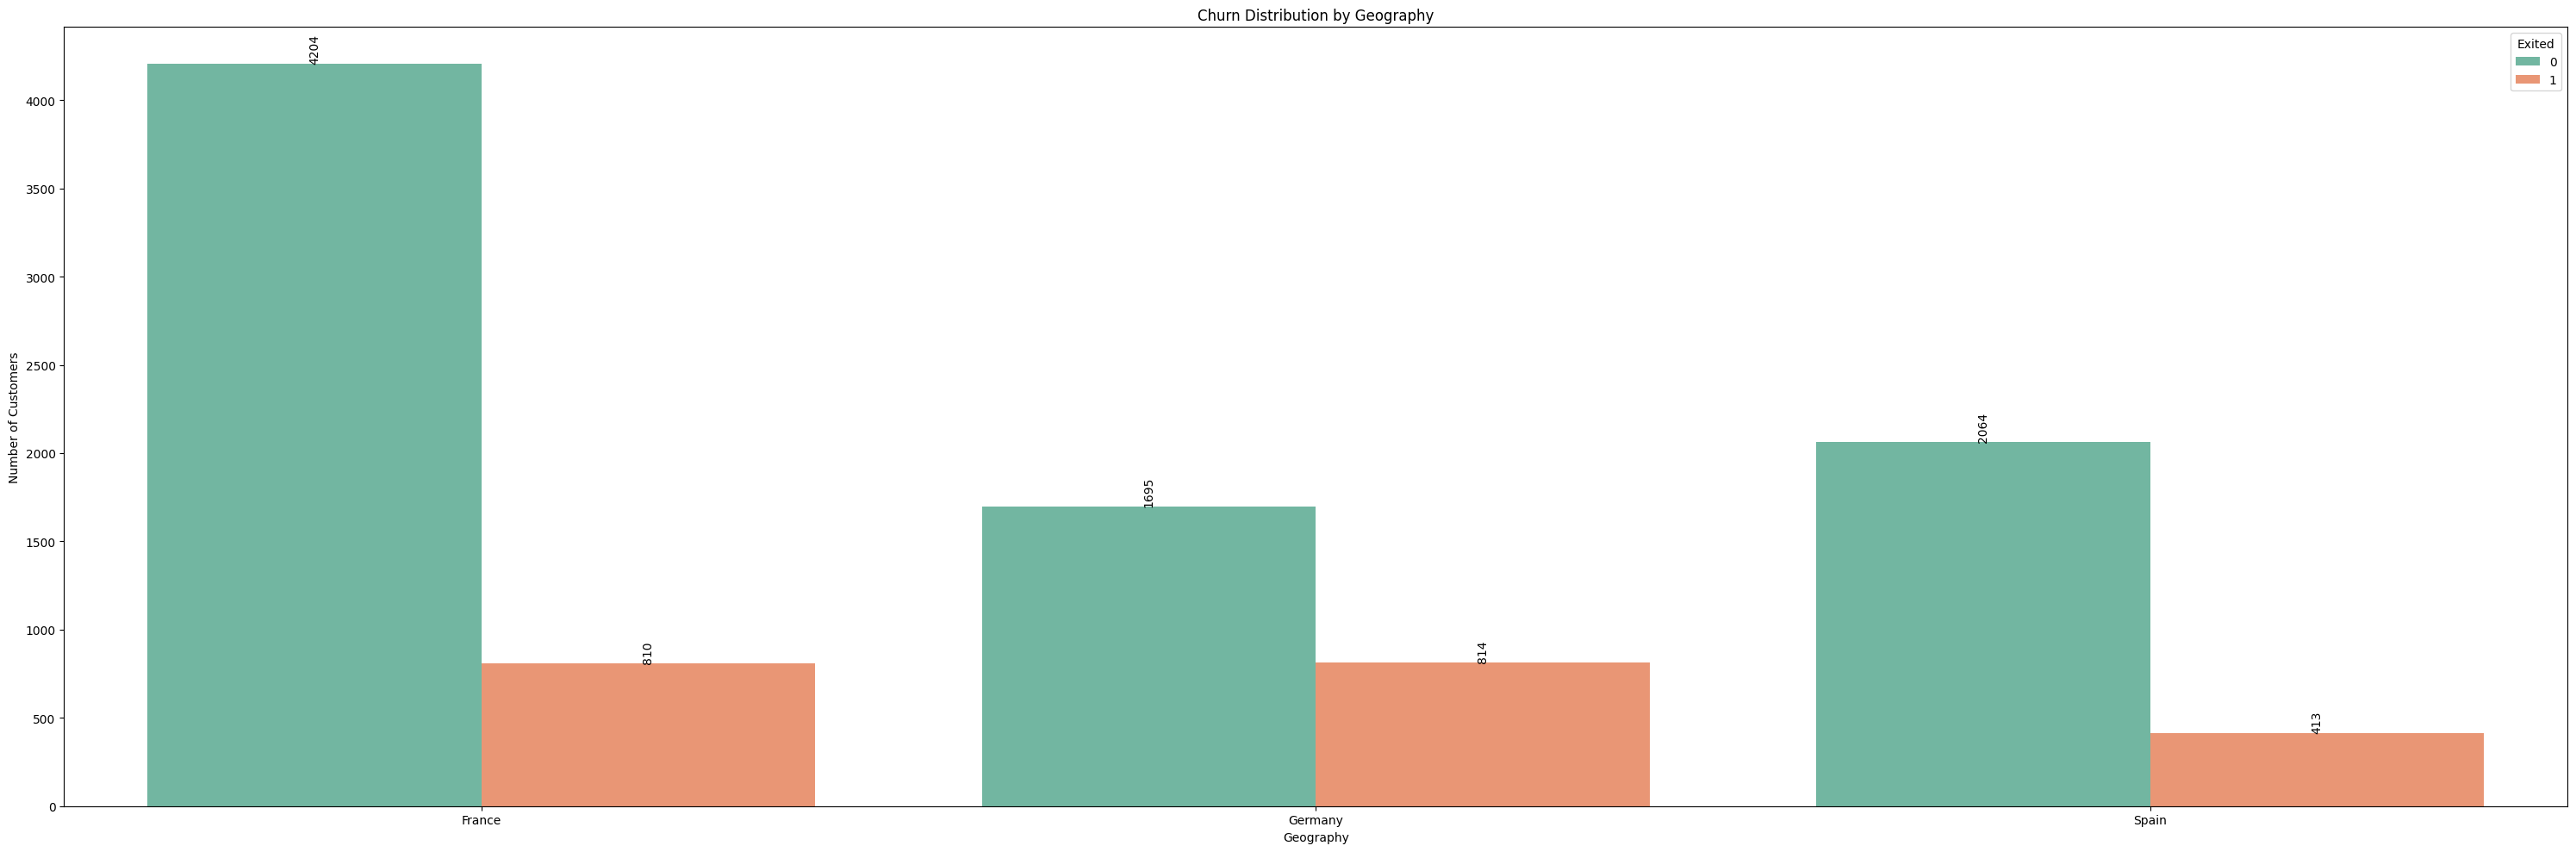

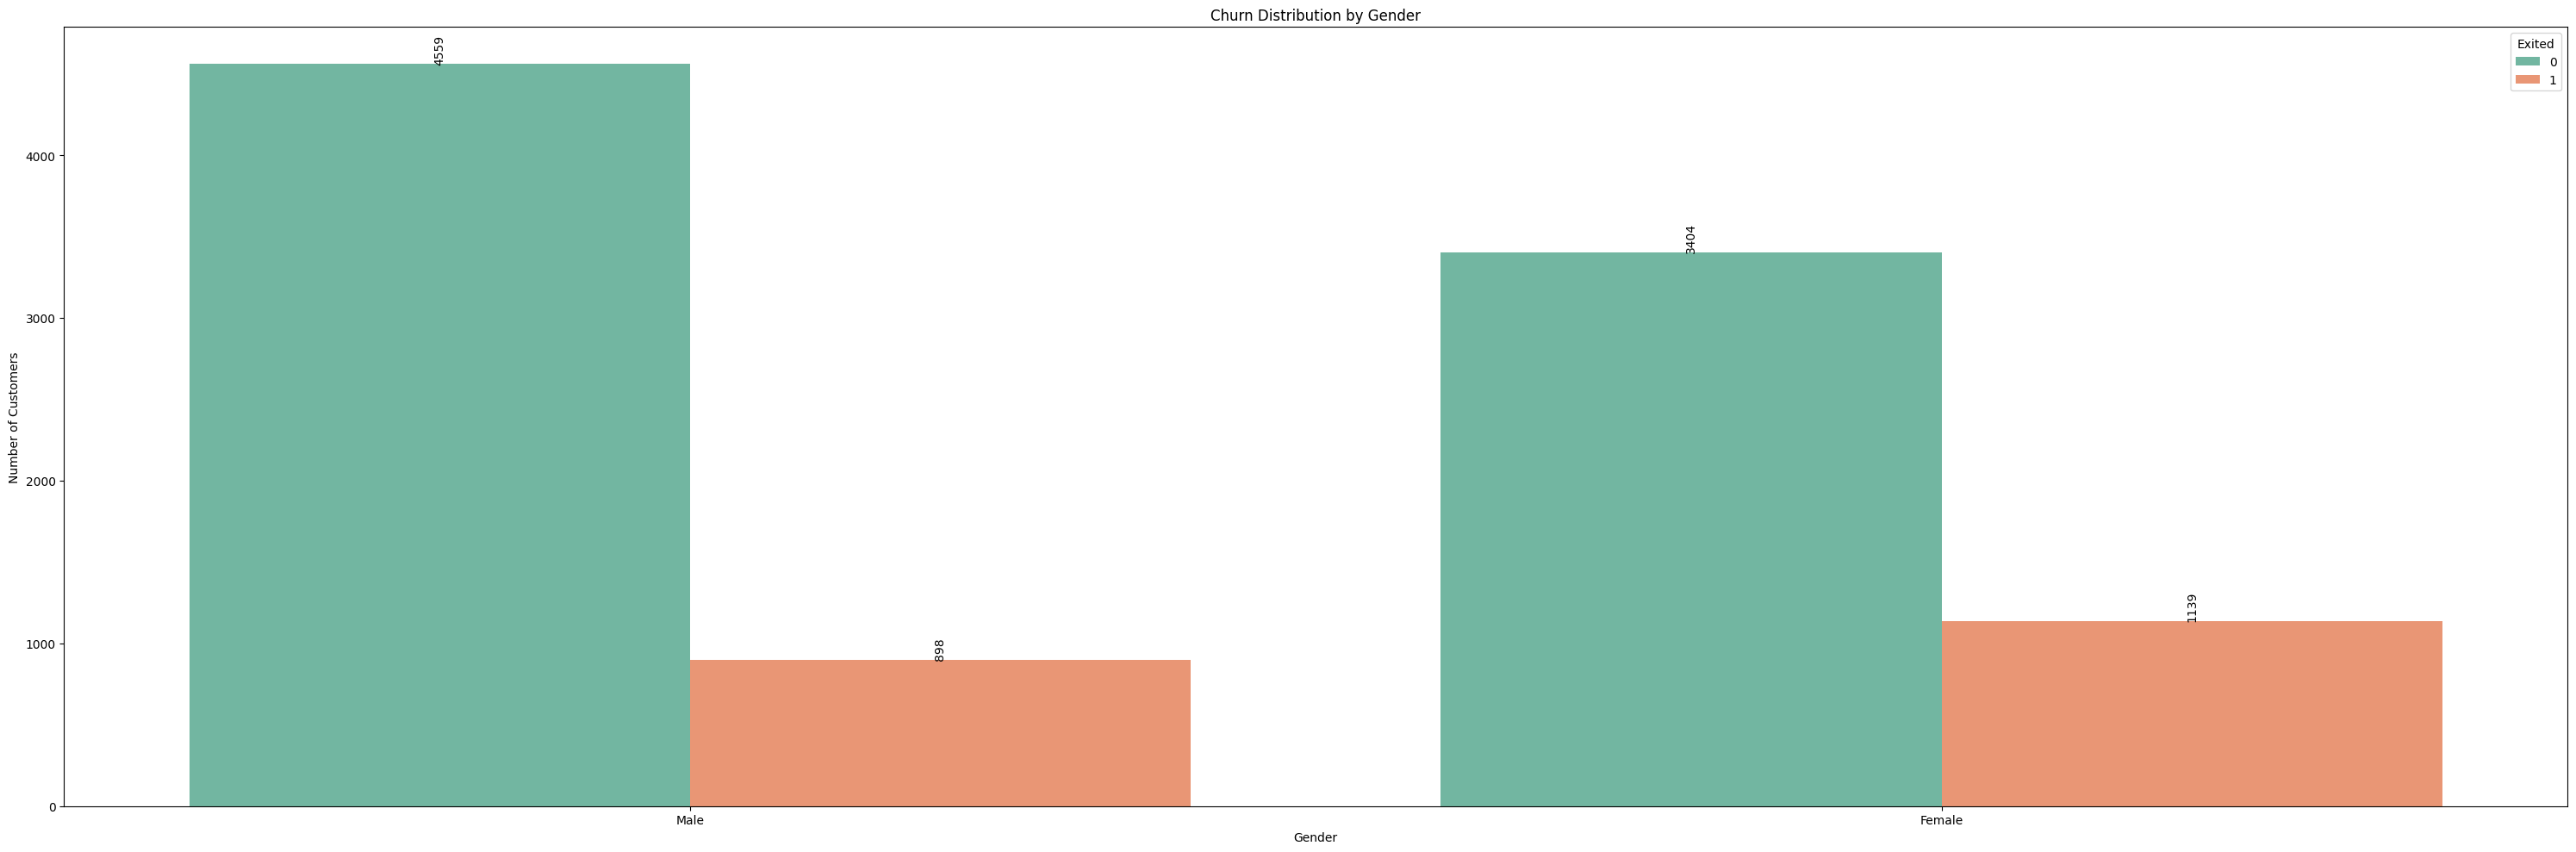

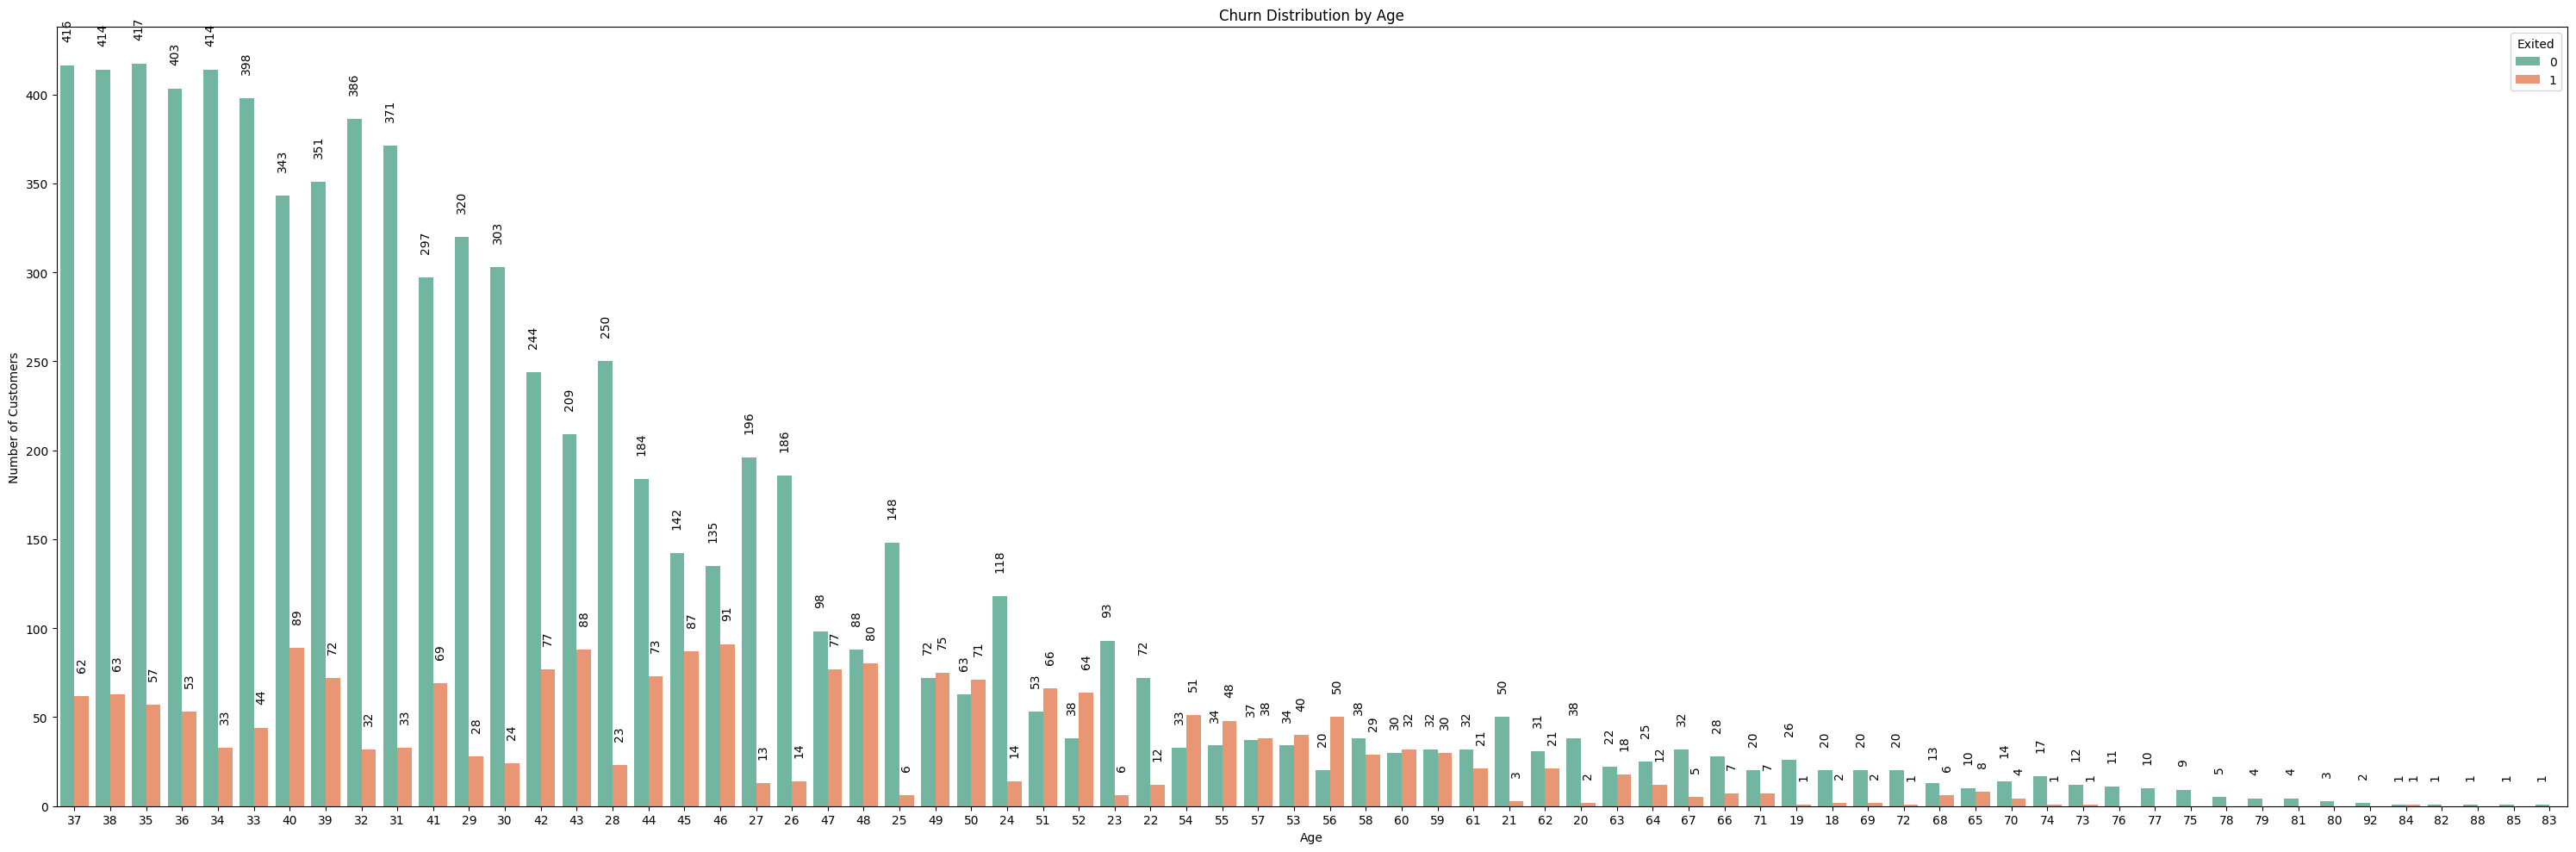

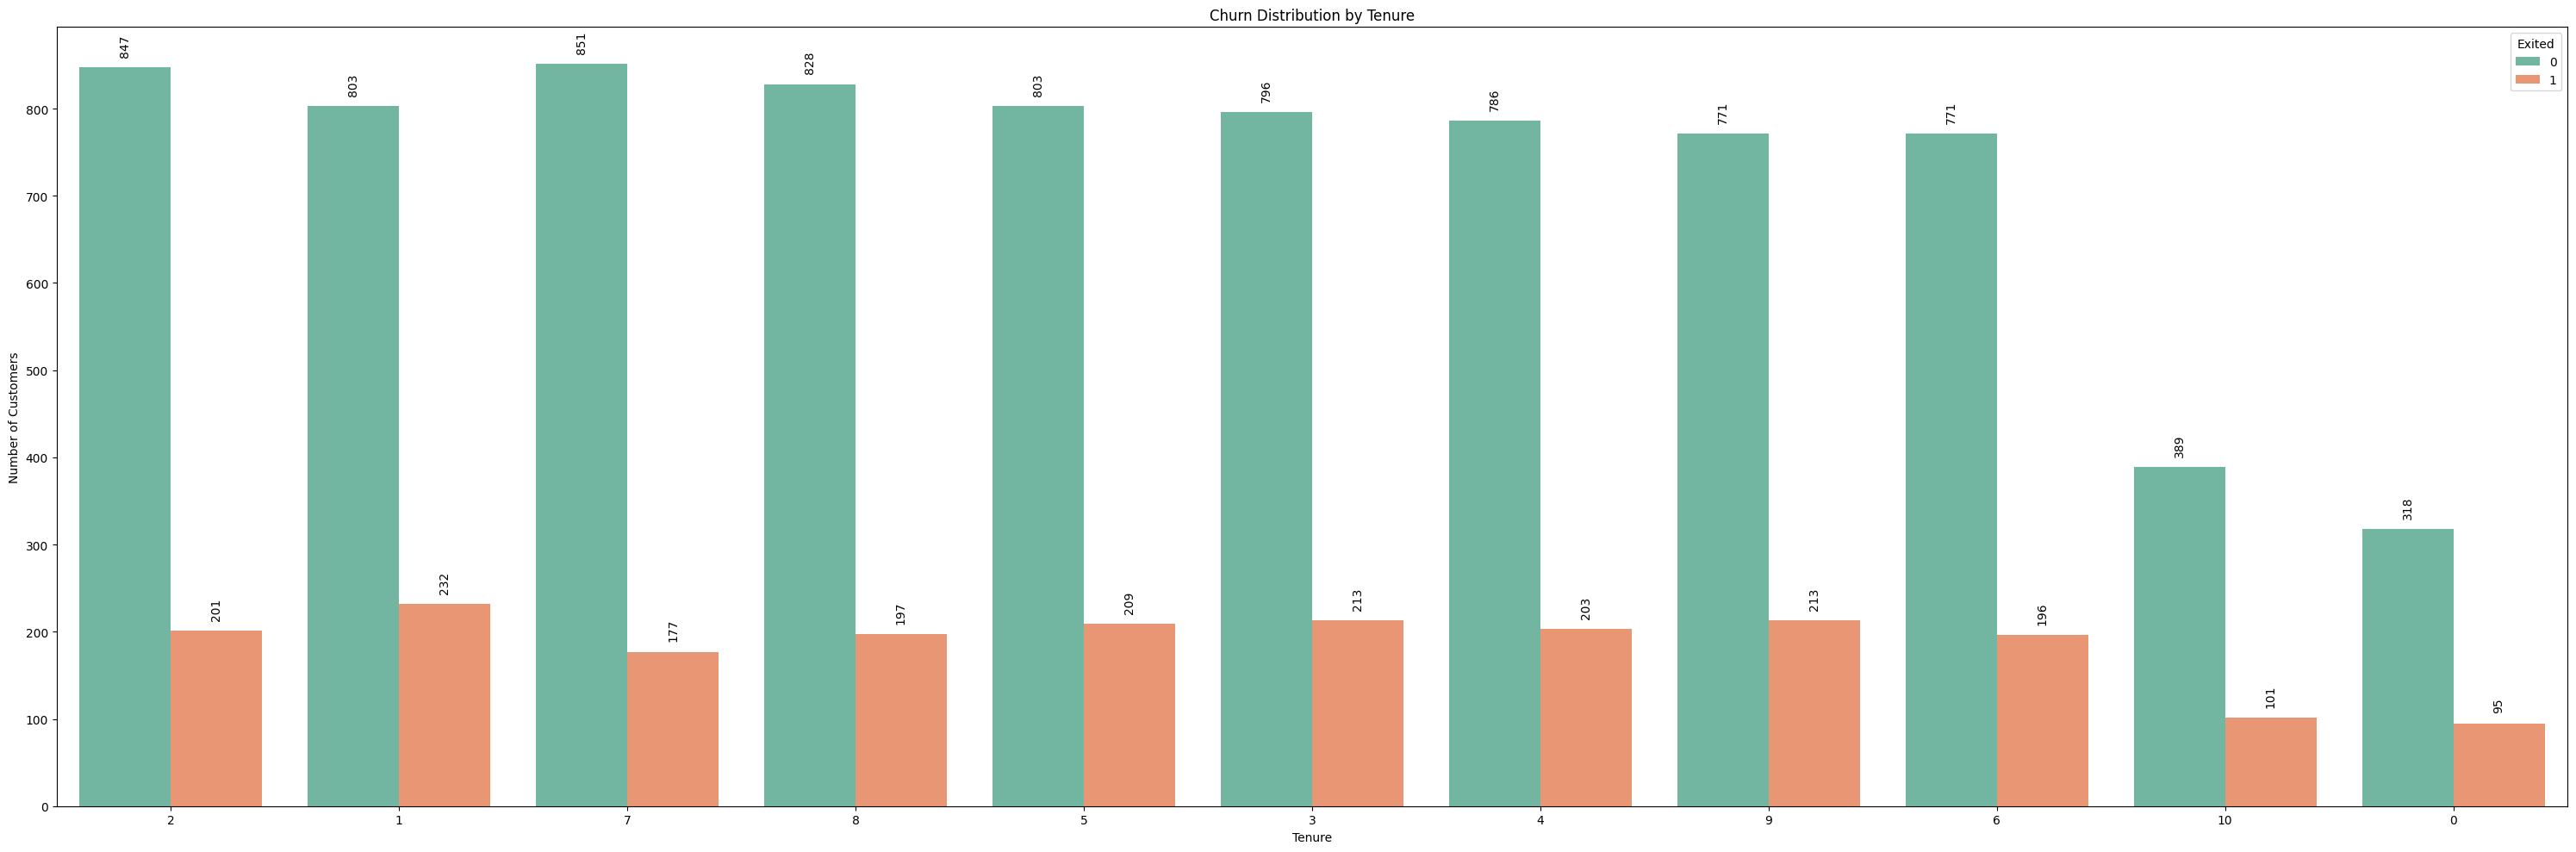

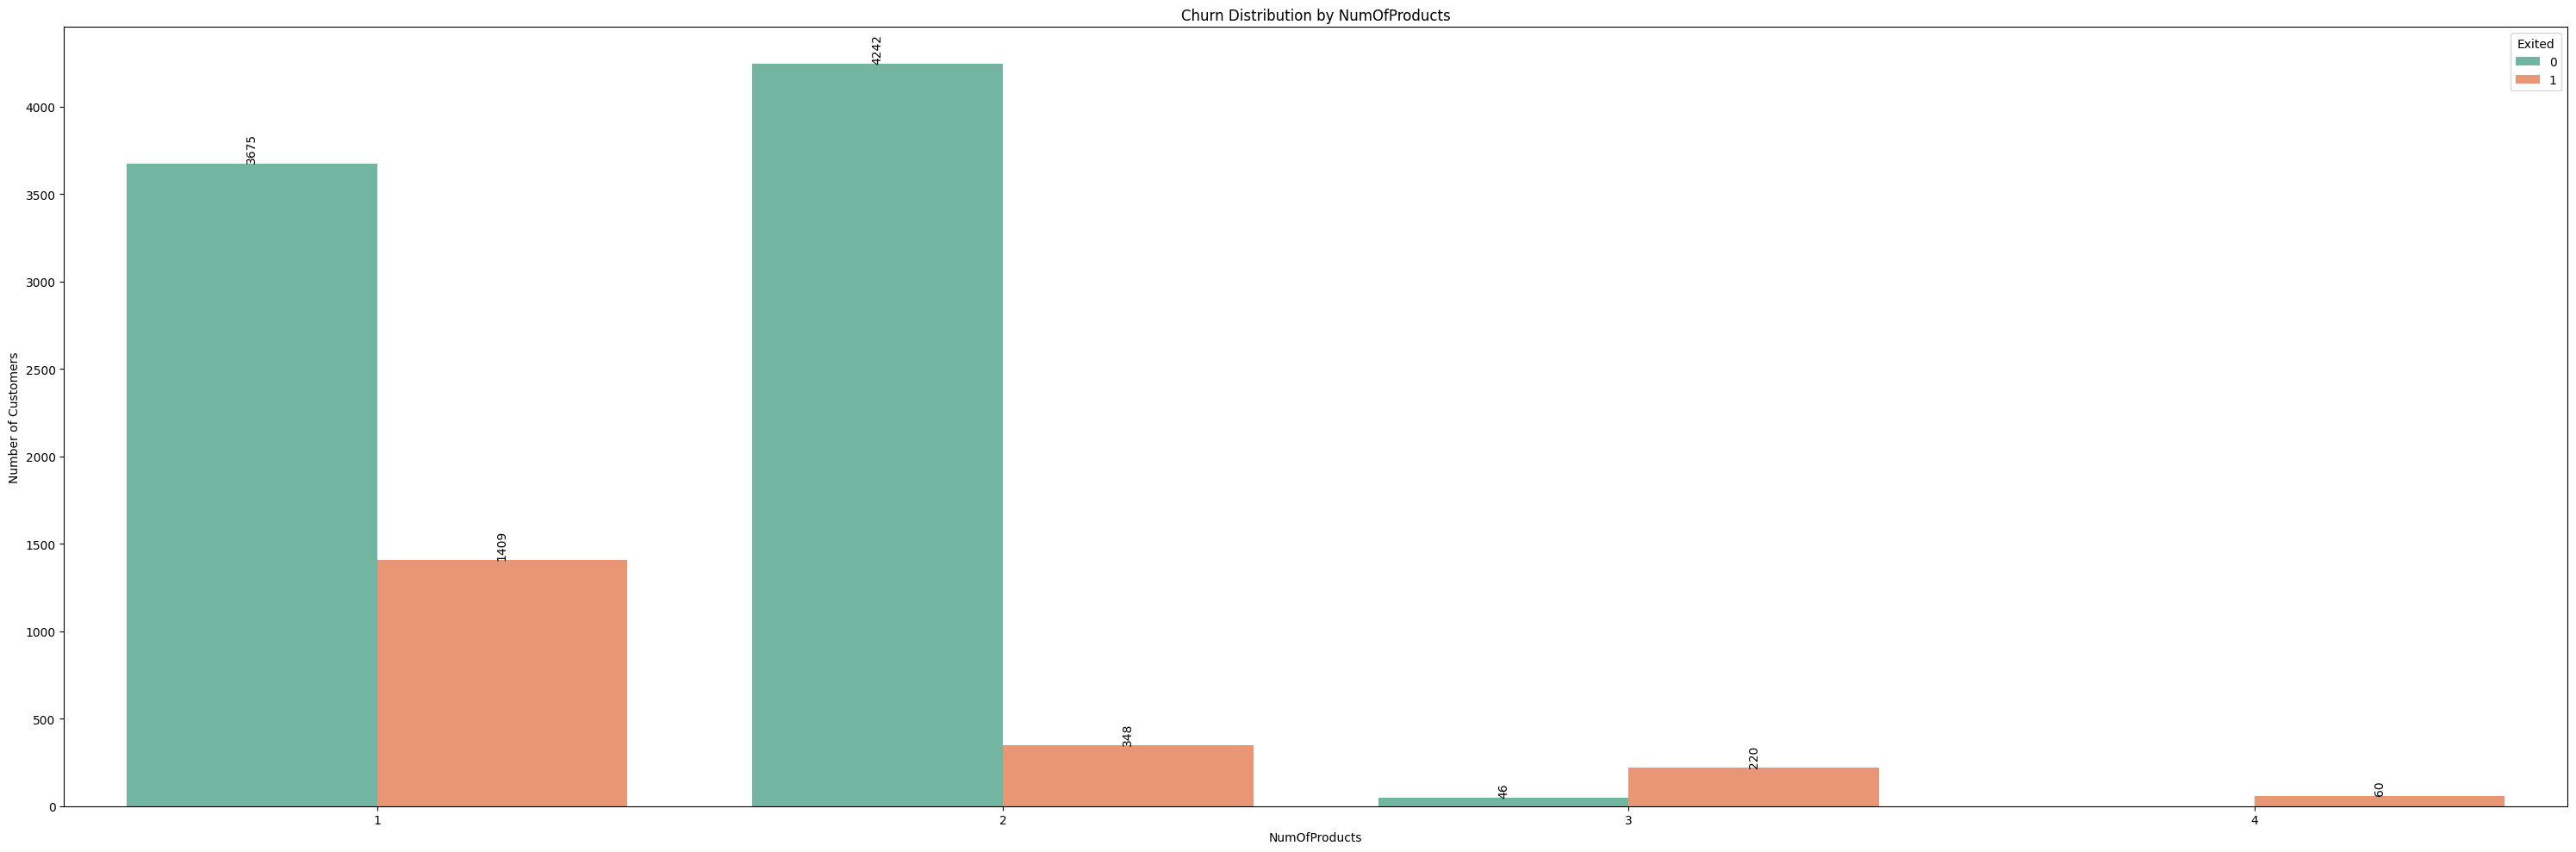

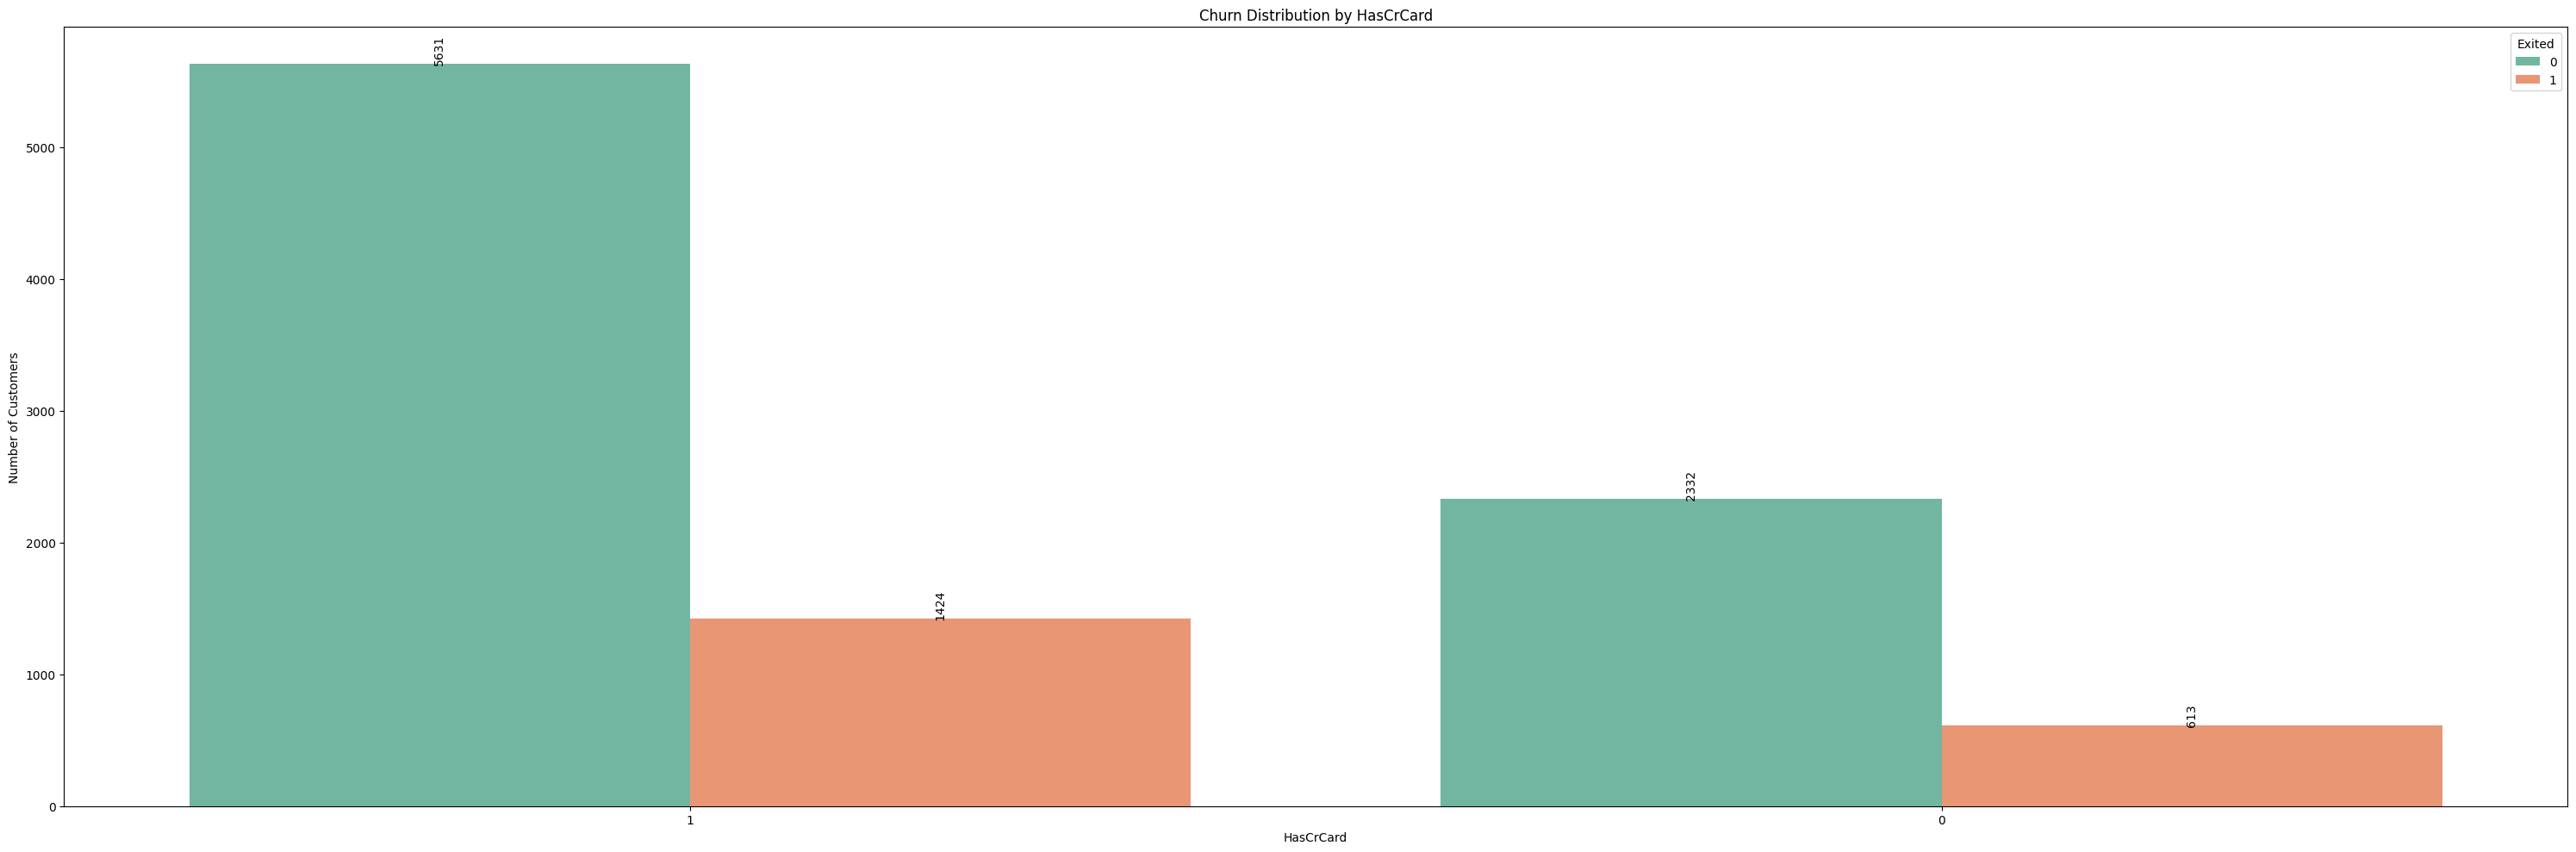

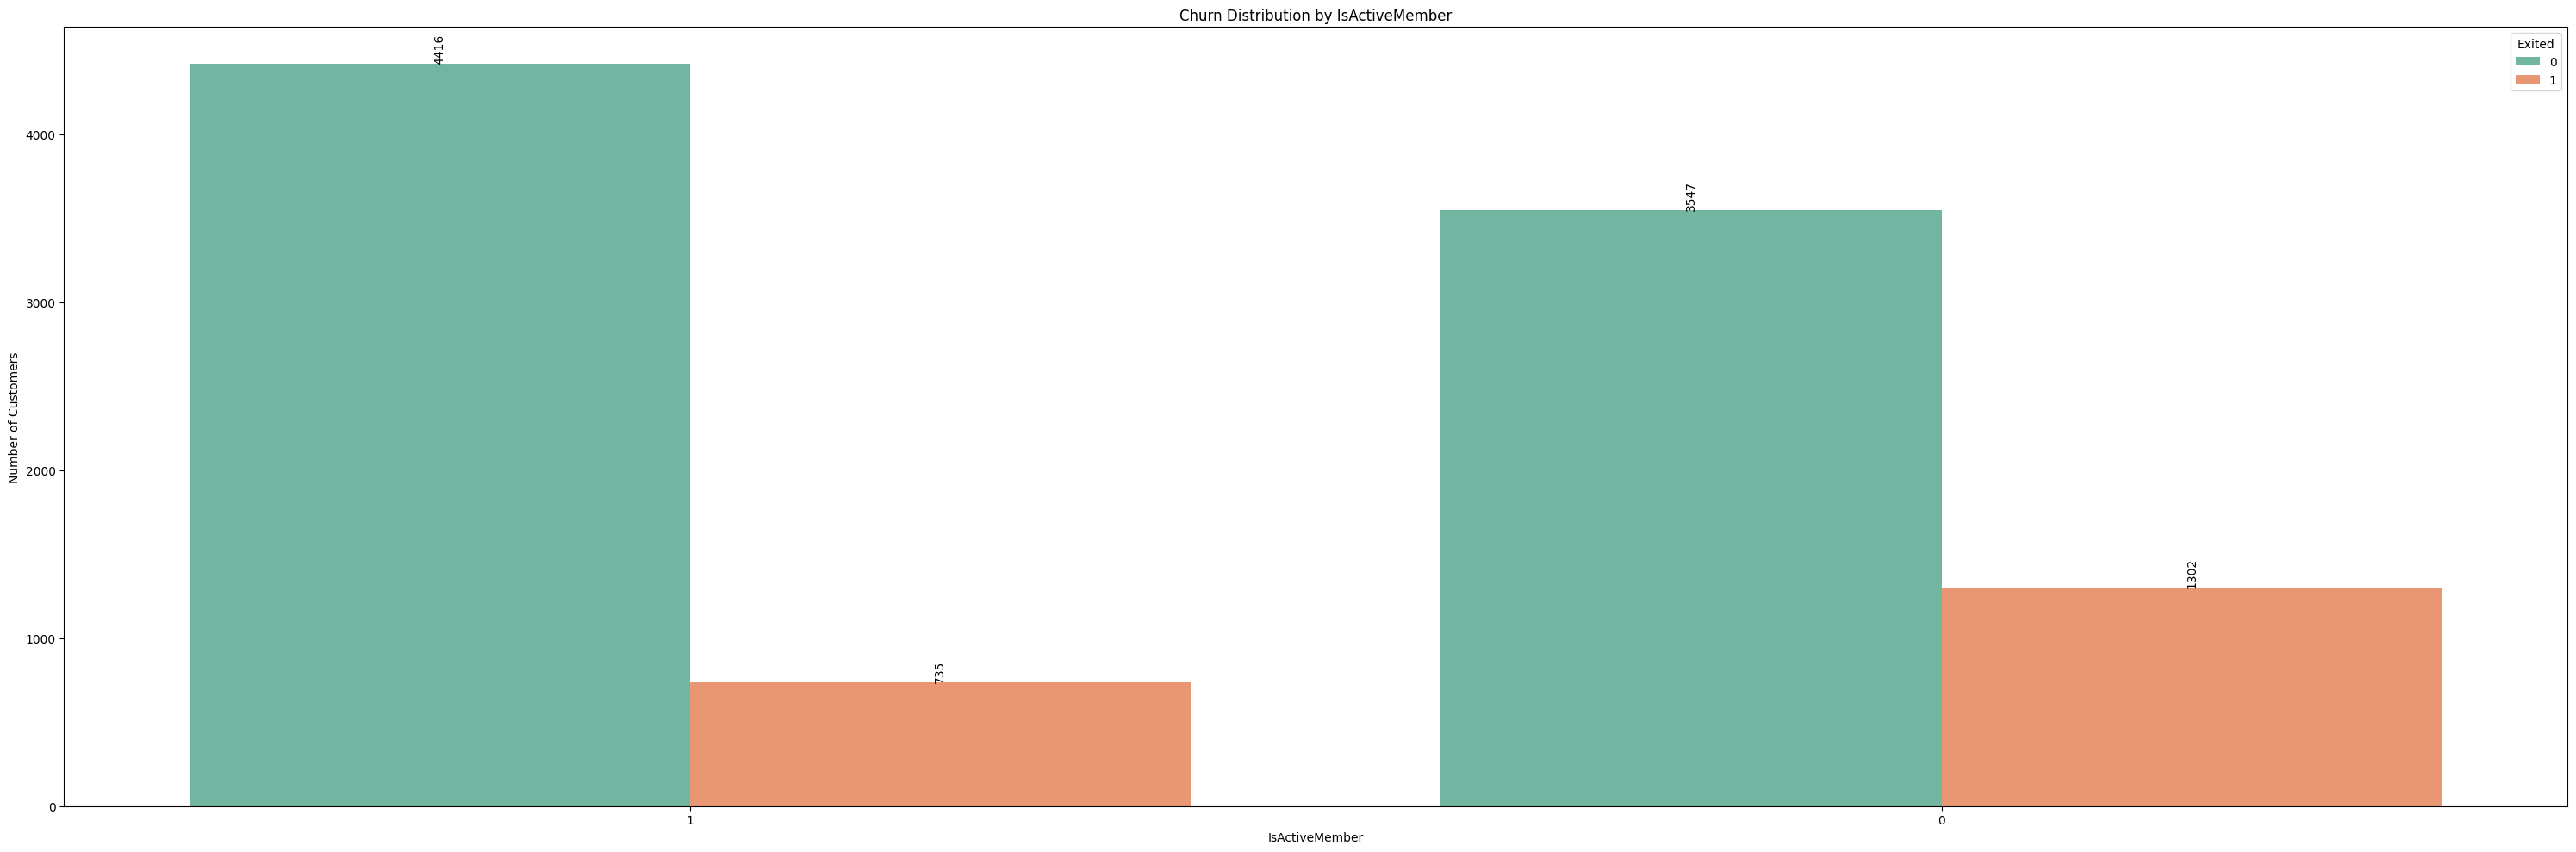

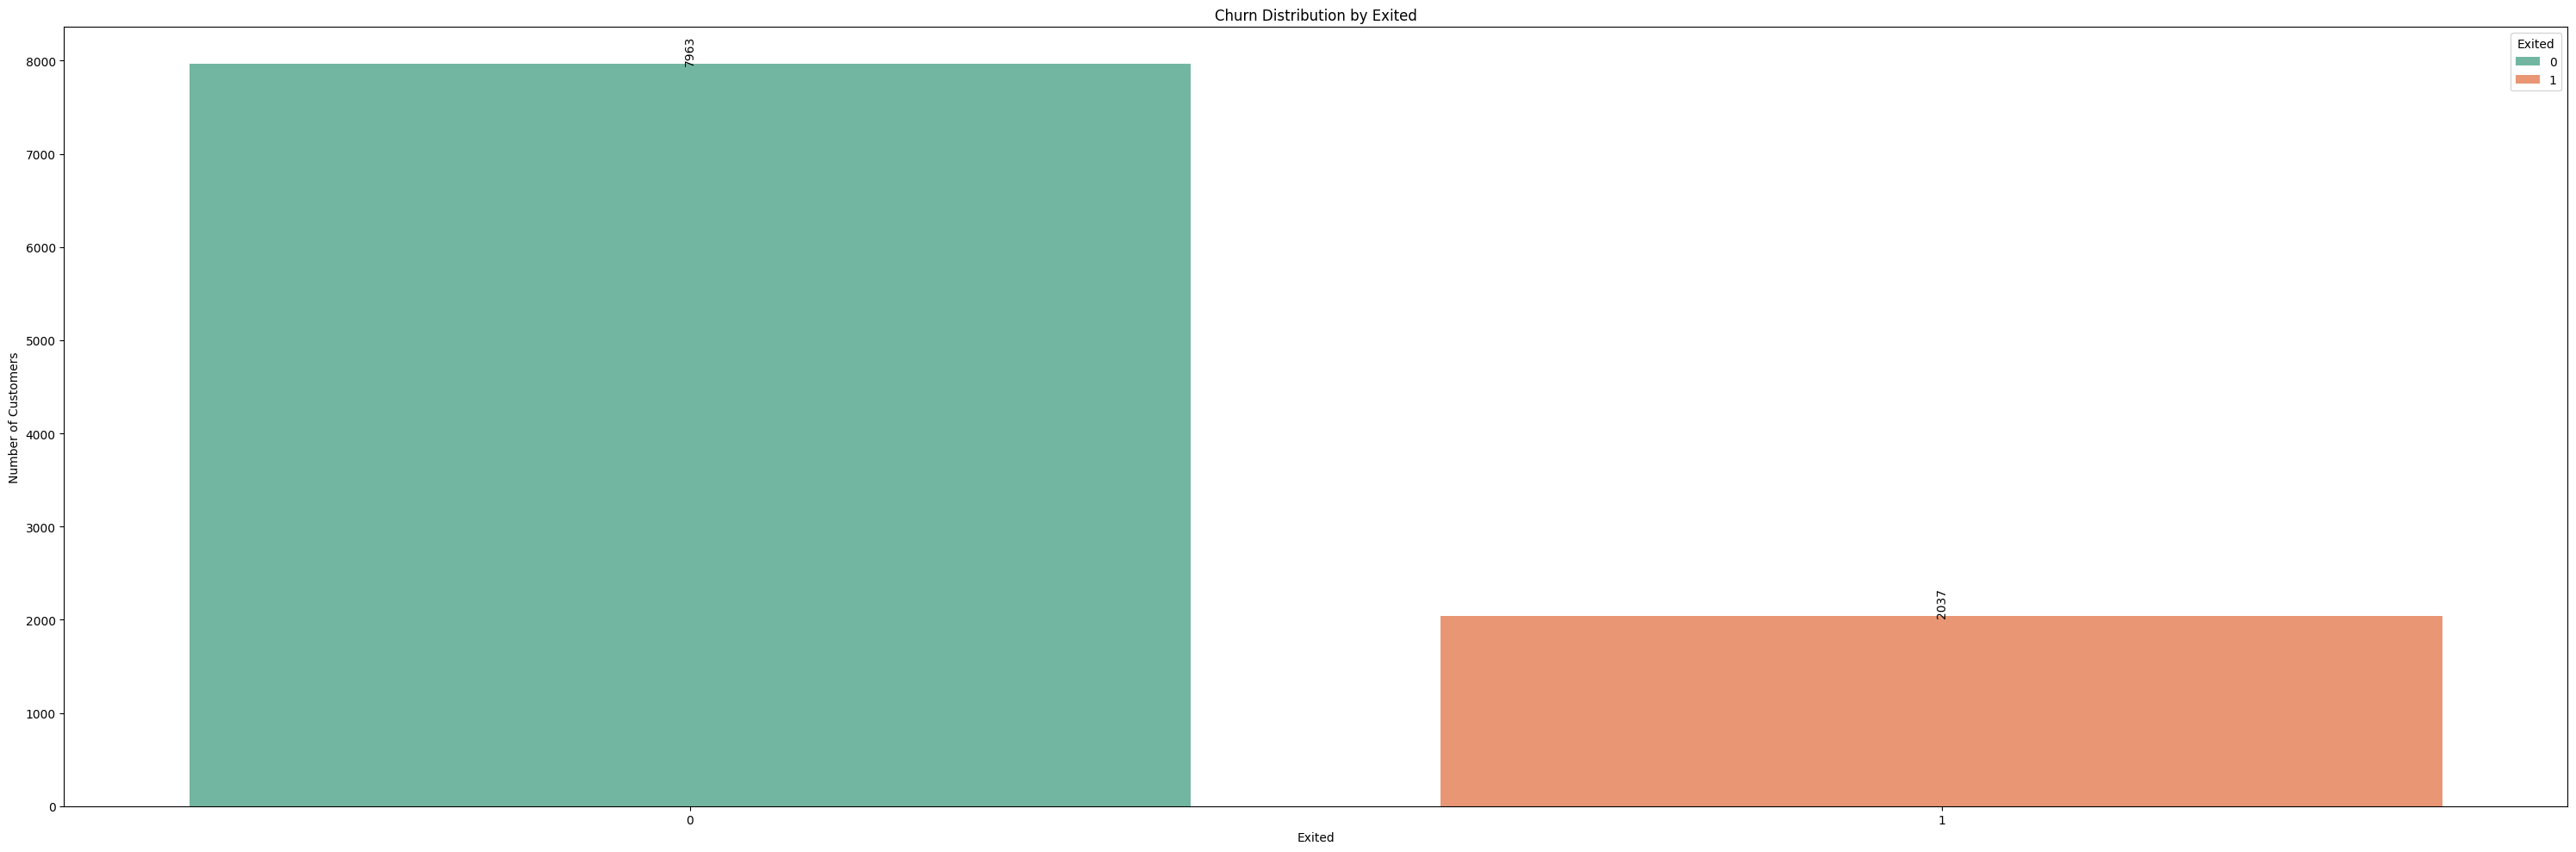

In [11]:
for i in df.columns:
    if i!='CreditScore' and i!='Balance' and i!='EstimatedSalary':
        plt.figure(figsize=(30,10))
        ax=sns.countplot(data=df, x=df[i], hue='Exited', order=df[i].value_counts().index, palette='Set2')
        plt.xticks(rotation=0)
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{height:.0f}',(p.get_x() + p.get_width() / 2, height + 15.0),ha='center', rotation=90)
        plt.title(f'Churn Distribution by {i}')
        plt.xlabel(i)
        plt.ylabel('Number of Customers')
        plt.tight_layout()
        plt.show()

### Churned customer as per Geography and Gender. 

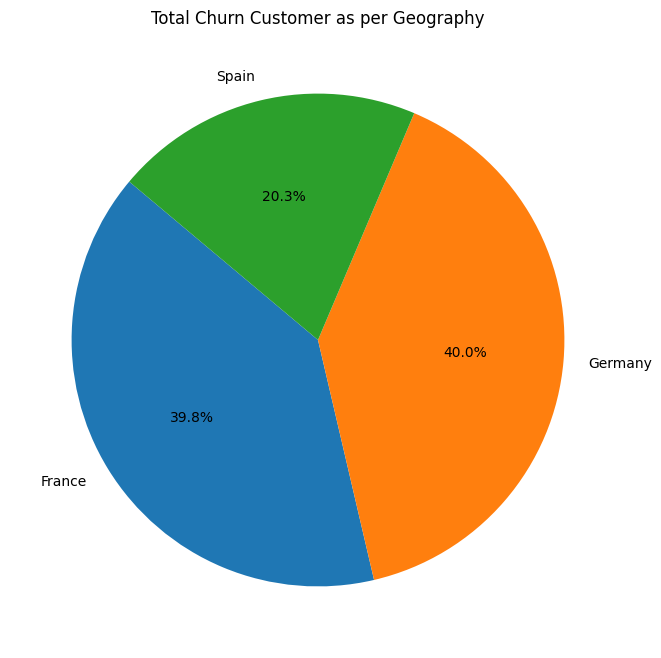

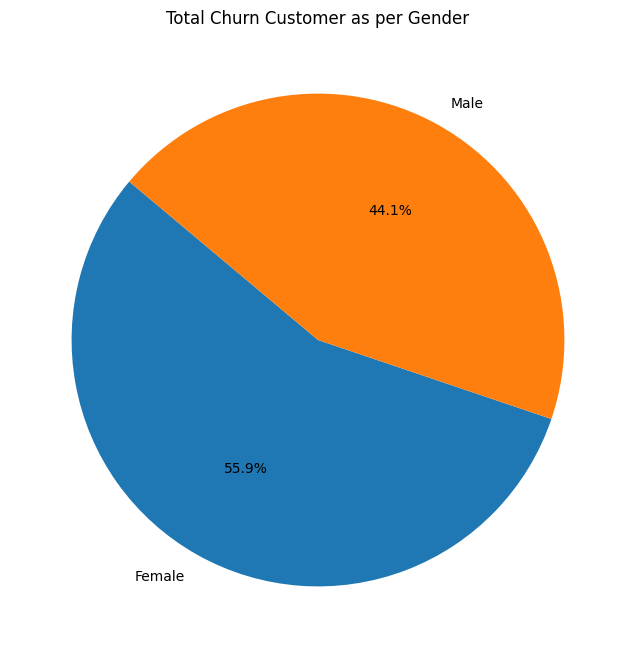

In [12]:
churned_df=df[df['Exited']==1]
for i in df.columns:
    if i in ['Geography', 'Gender']:
        churn_customer = churned_df.groupby(i)['Exited'].sum()
        plt.figure(figsize=(8, 8))
        churn_customer.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Total Churn Customer as per {i}')
        plt.ylabel('')  # Hide y-axis label
        plt.show()

### Maximum and minimum age of churned customer as per geography and gender.

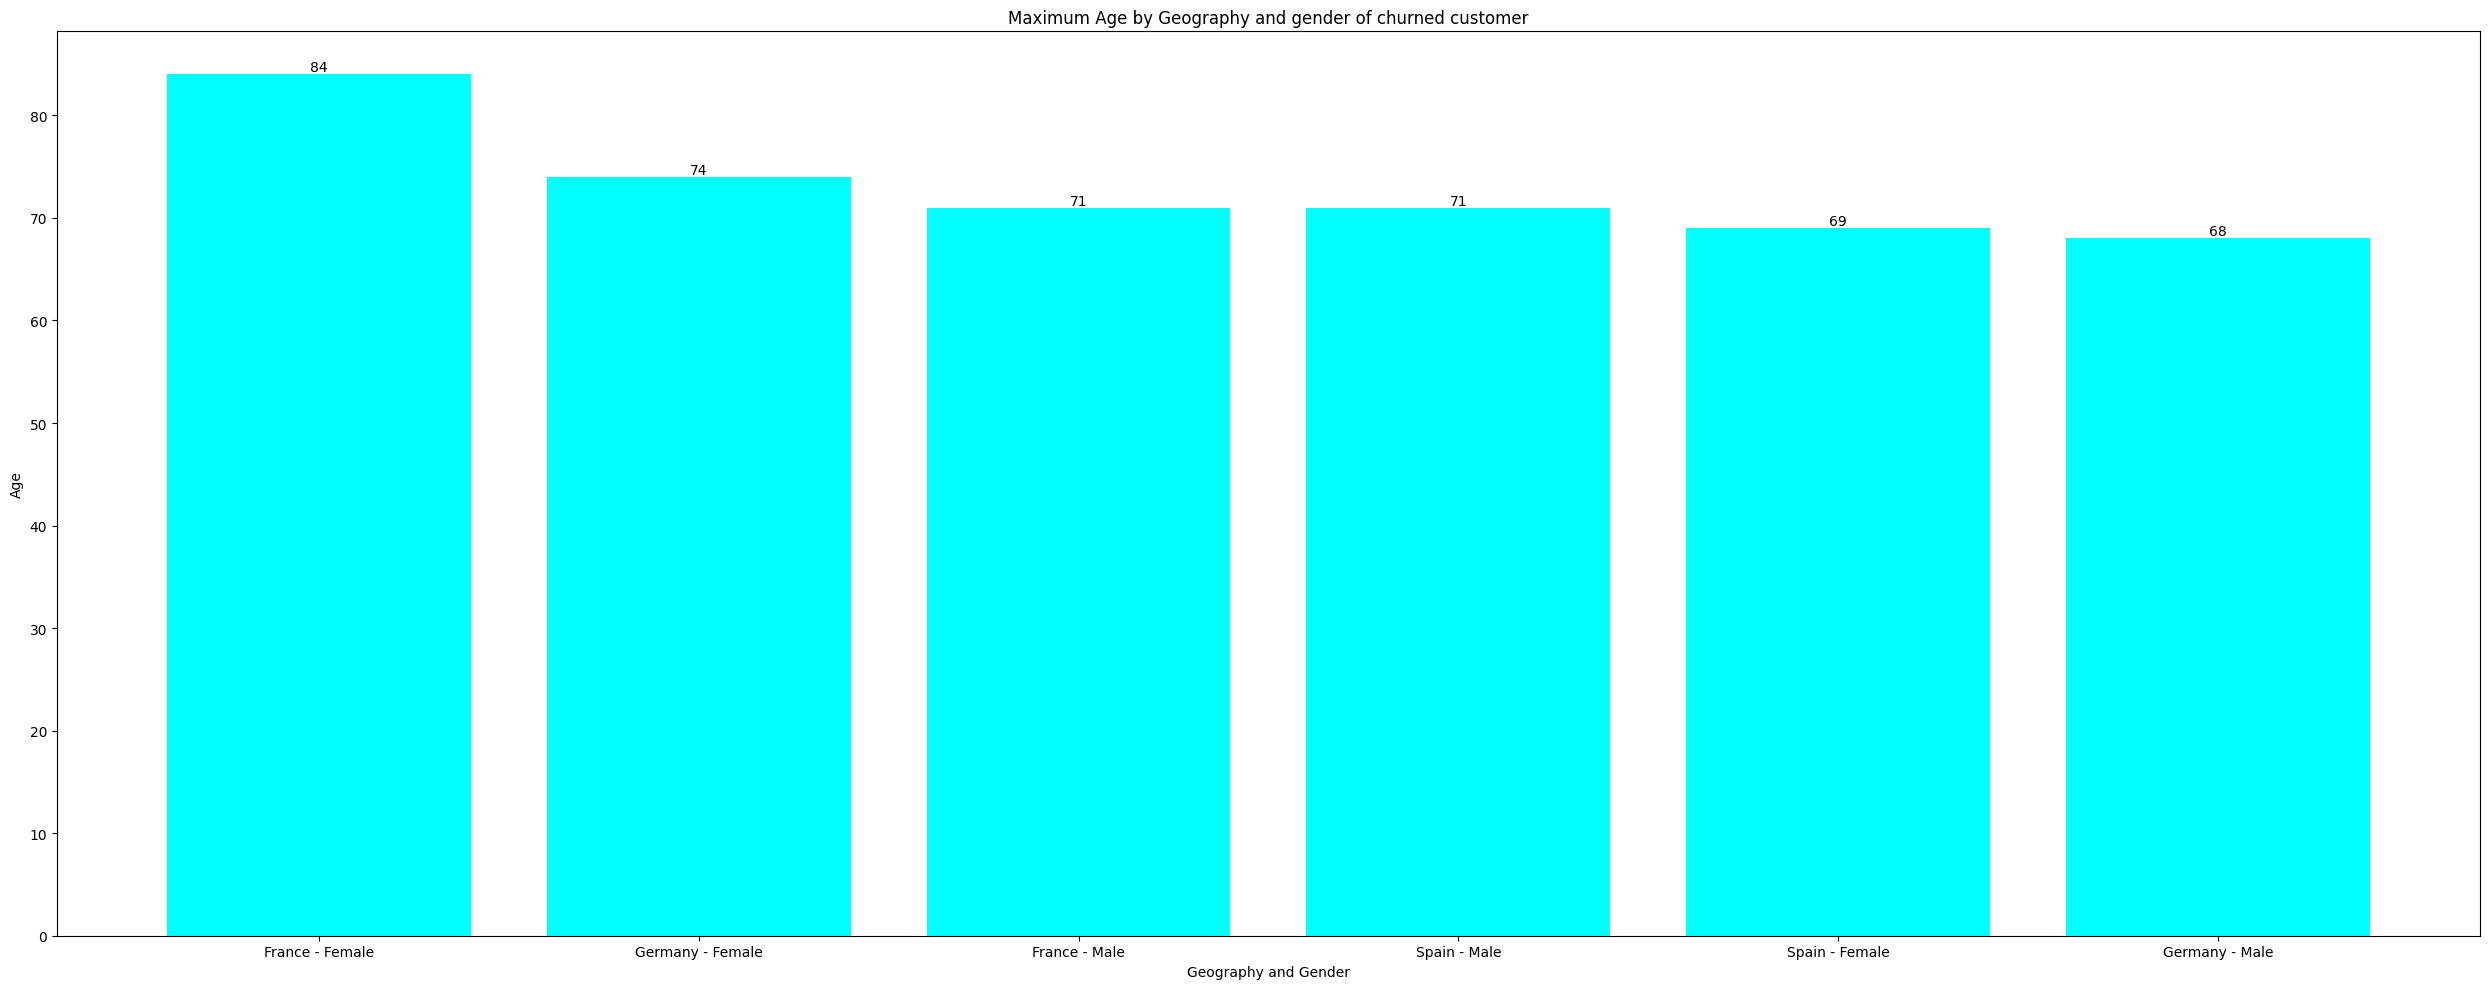

In [13]:
max_age=churned_df.groupby(['Geography','Gender'])['Age'].max()
sorted_max_age=max_age.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar([f"{geo} - {gender}" for geo, gender in sorted_max_age.index], sorted_max_age.values, color='aqua')
plt.xlabel('Geography and Gender')
plt.ylabel('Age')
plt.title('Maximum Age by Geography and gender of churned customer')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the maximum Age for each Geograhy and gender
for i, age in enumerate(sorted_max_age):
    plt.text(i, age, f"{age}", ha='center', va='bottom', rotation=0)

plt.show()

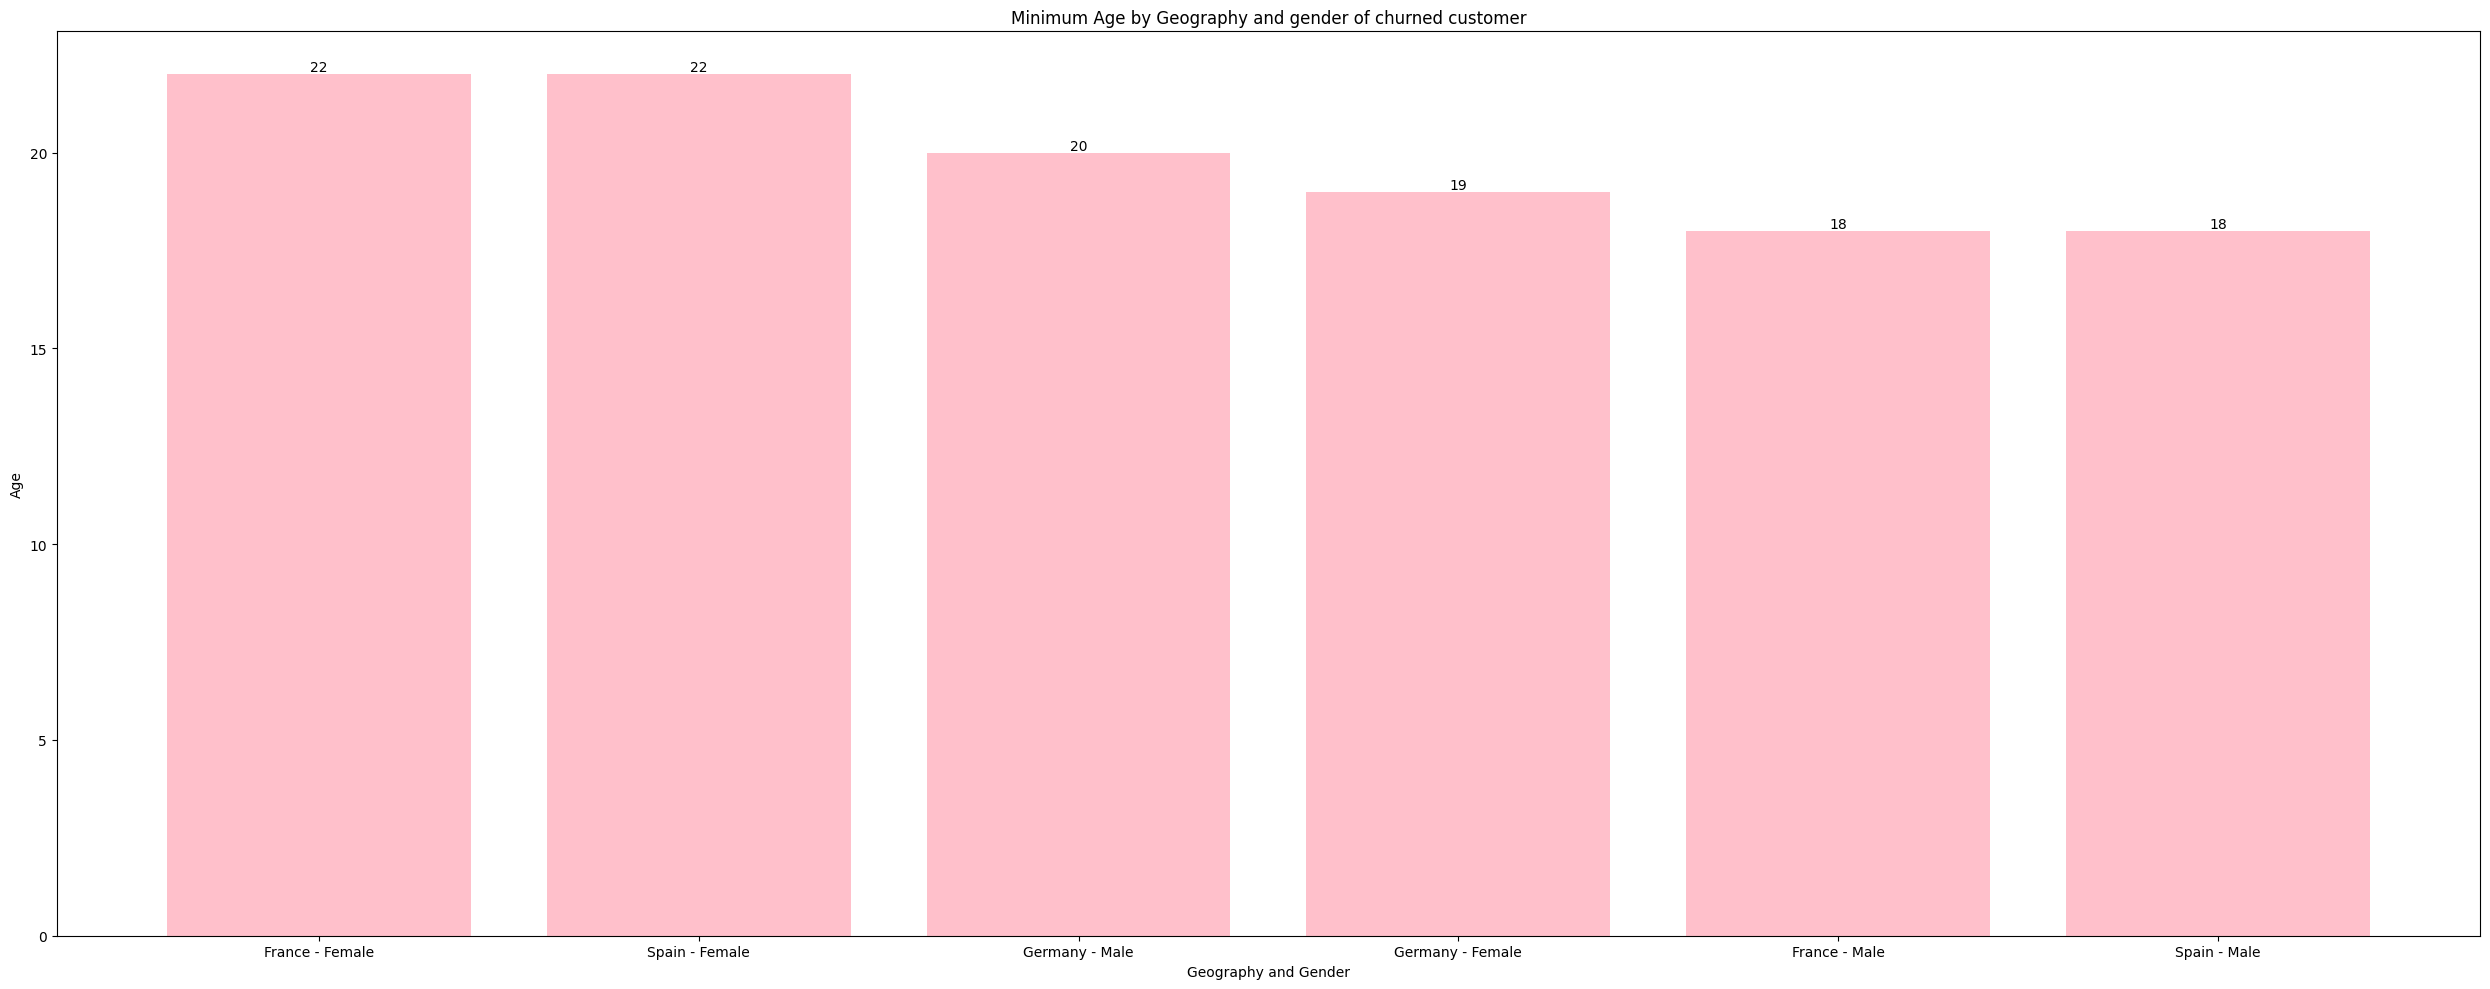

In [14]:
min_age=churned_df.groupby(['Geography','Gender'])['Age'].min()
sorted_min_age=min_age.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar([f"{geo} - {gender}" for geo, gender in sorted_min_age.index], sorted_min_age.values, color='pink')
plt.xlabel('Geography and Gender')
plt.ylabel('Age')
plt.title('Minimum Age by Geography and gender of churned customer')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the minimum Age for each Geograhy and gender
for i, age in enumerate(sorted_min_age):
    plt.text(i, age, f"{age}", ha='center', va='bottom', rotation=0)

plt.show()

### Maximum and minimum age of non churned customer.

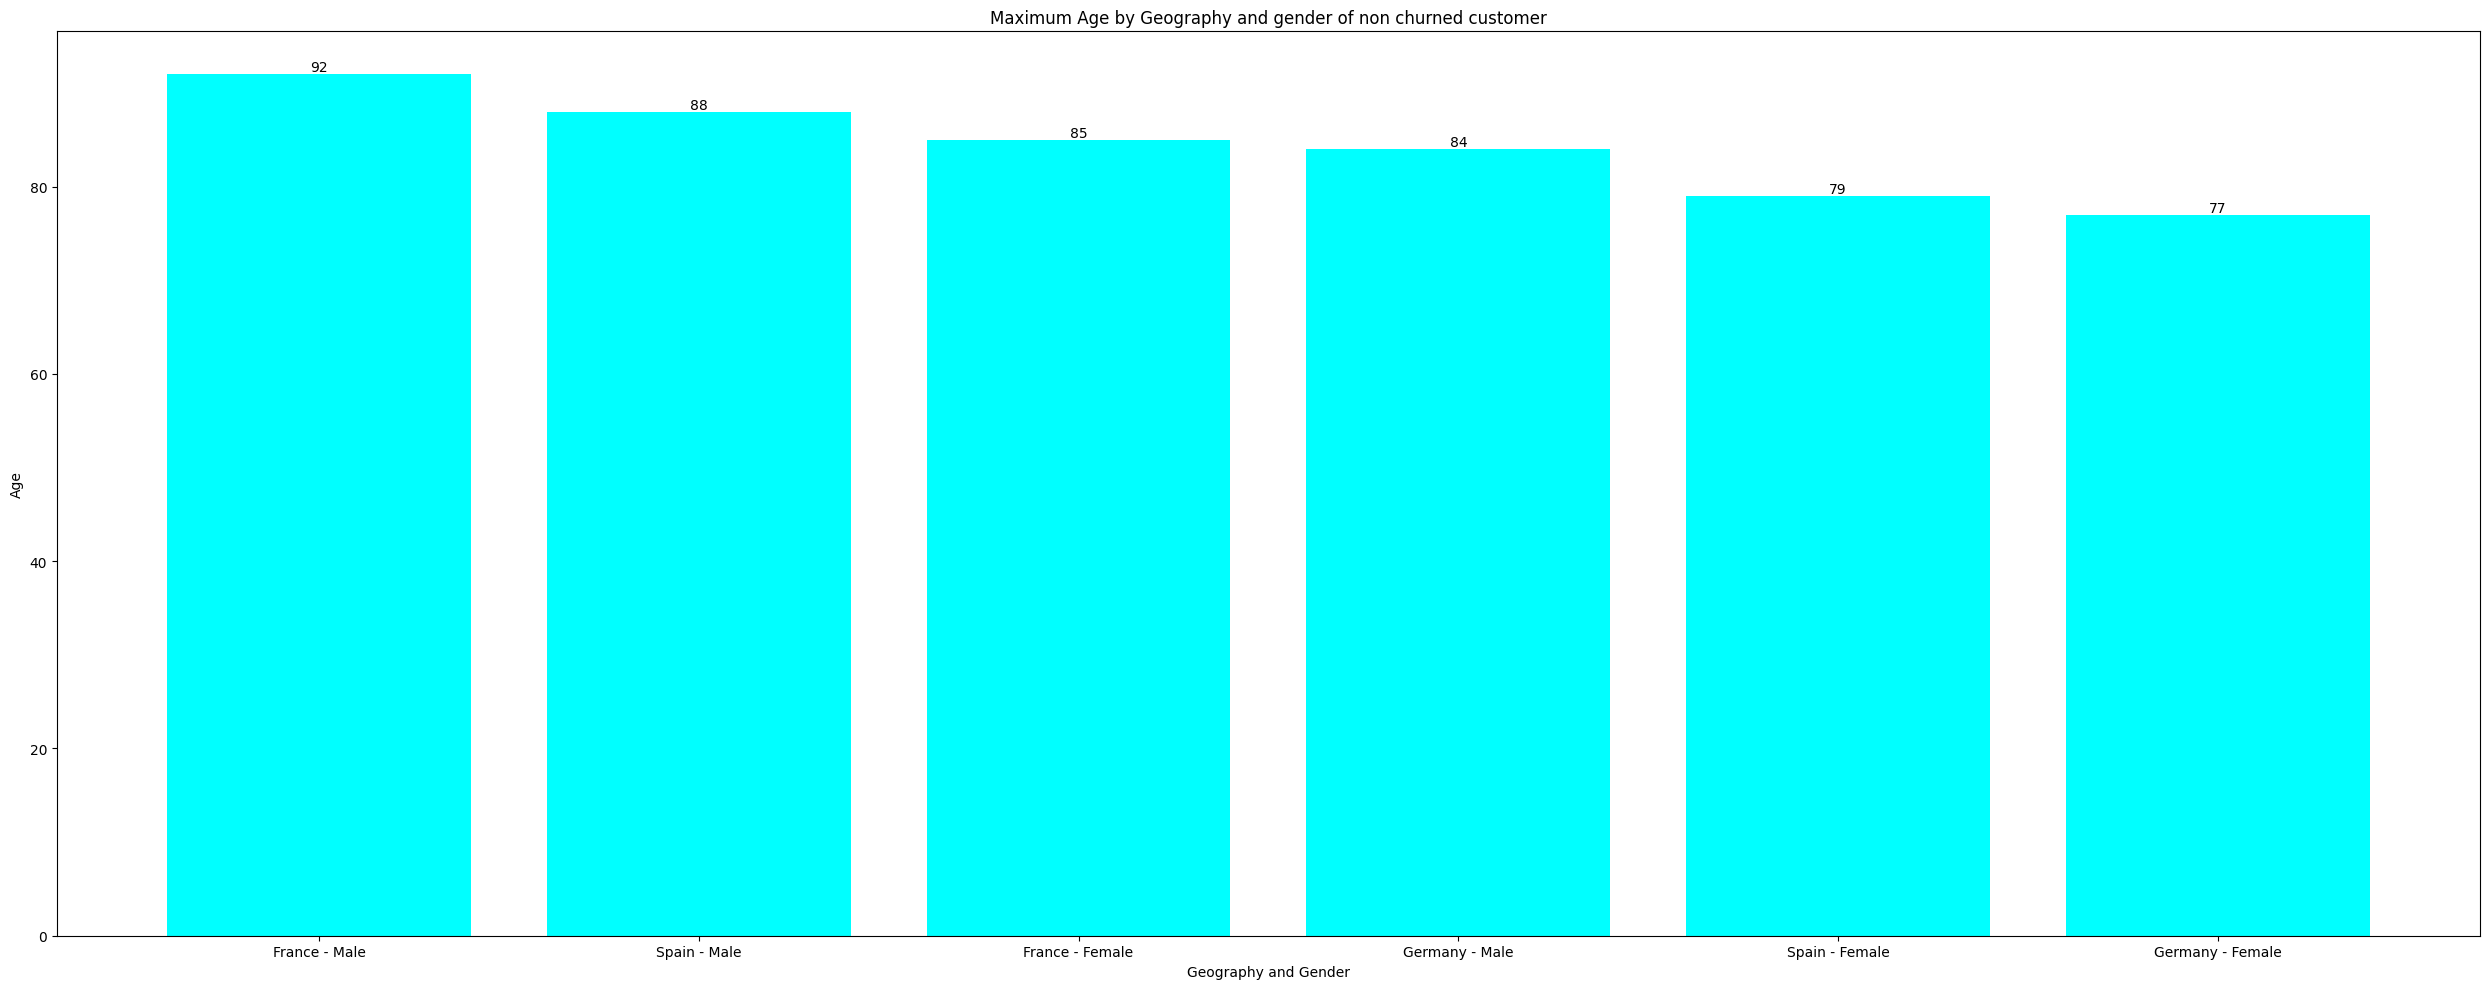

In [15]:
nonchurned_df=df[df['Exited']==0]
nmax_age=nonchurned_df.groupby(['Geography','Gender'])['Age'].max()
sorted_nmax_age=nmax_age.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar([f"{geo} - {gender}" for geo, gender in sorted_nmax_age.index], sorted_nmax_age.values, color='aqua')
plt.xlabel('Geography and Gender')
plt.ylabel('Age')
plt.title('Maximum Age by Geography and gender of non churned customer')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the maximum Age for each Geograhy and gender
for i, age in enumerate(sorted_nmax_age):
    plt.text(i, age, f"{age}", ha='center', va='bottom', rotation=0)

plt.show()

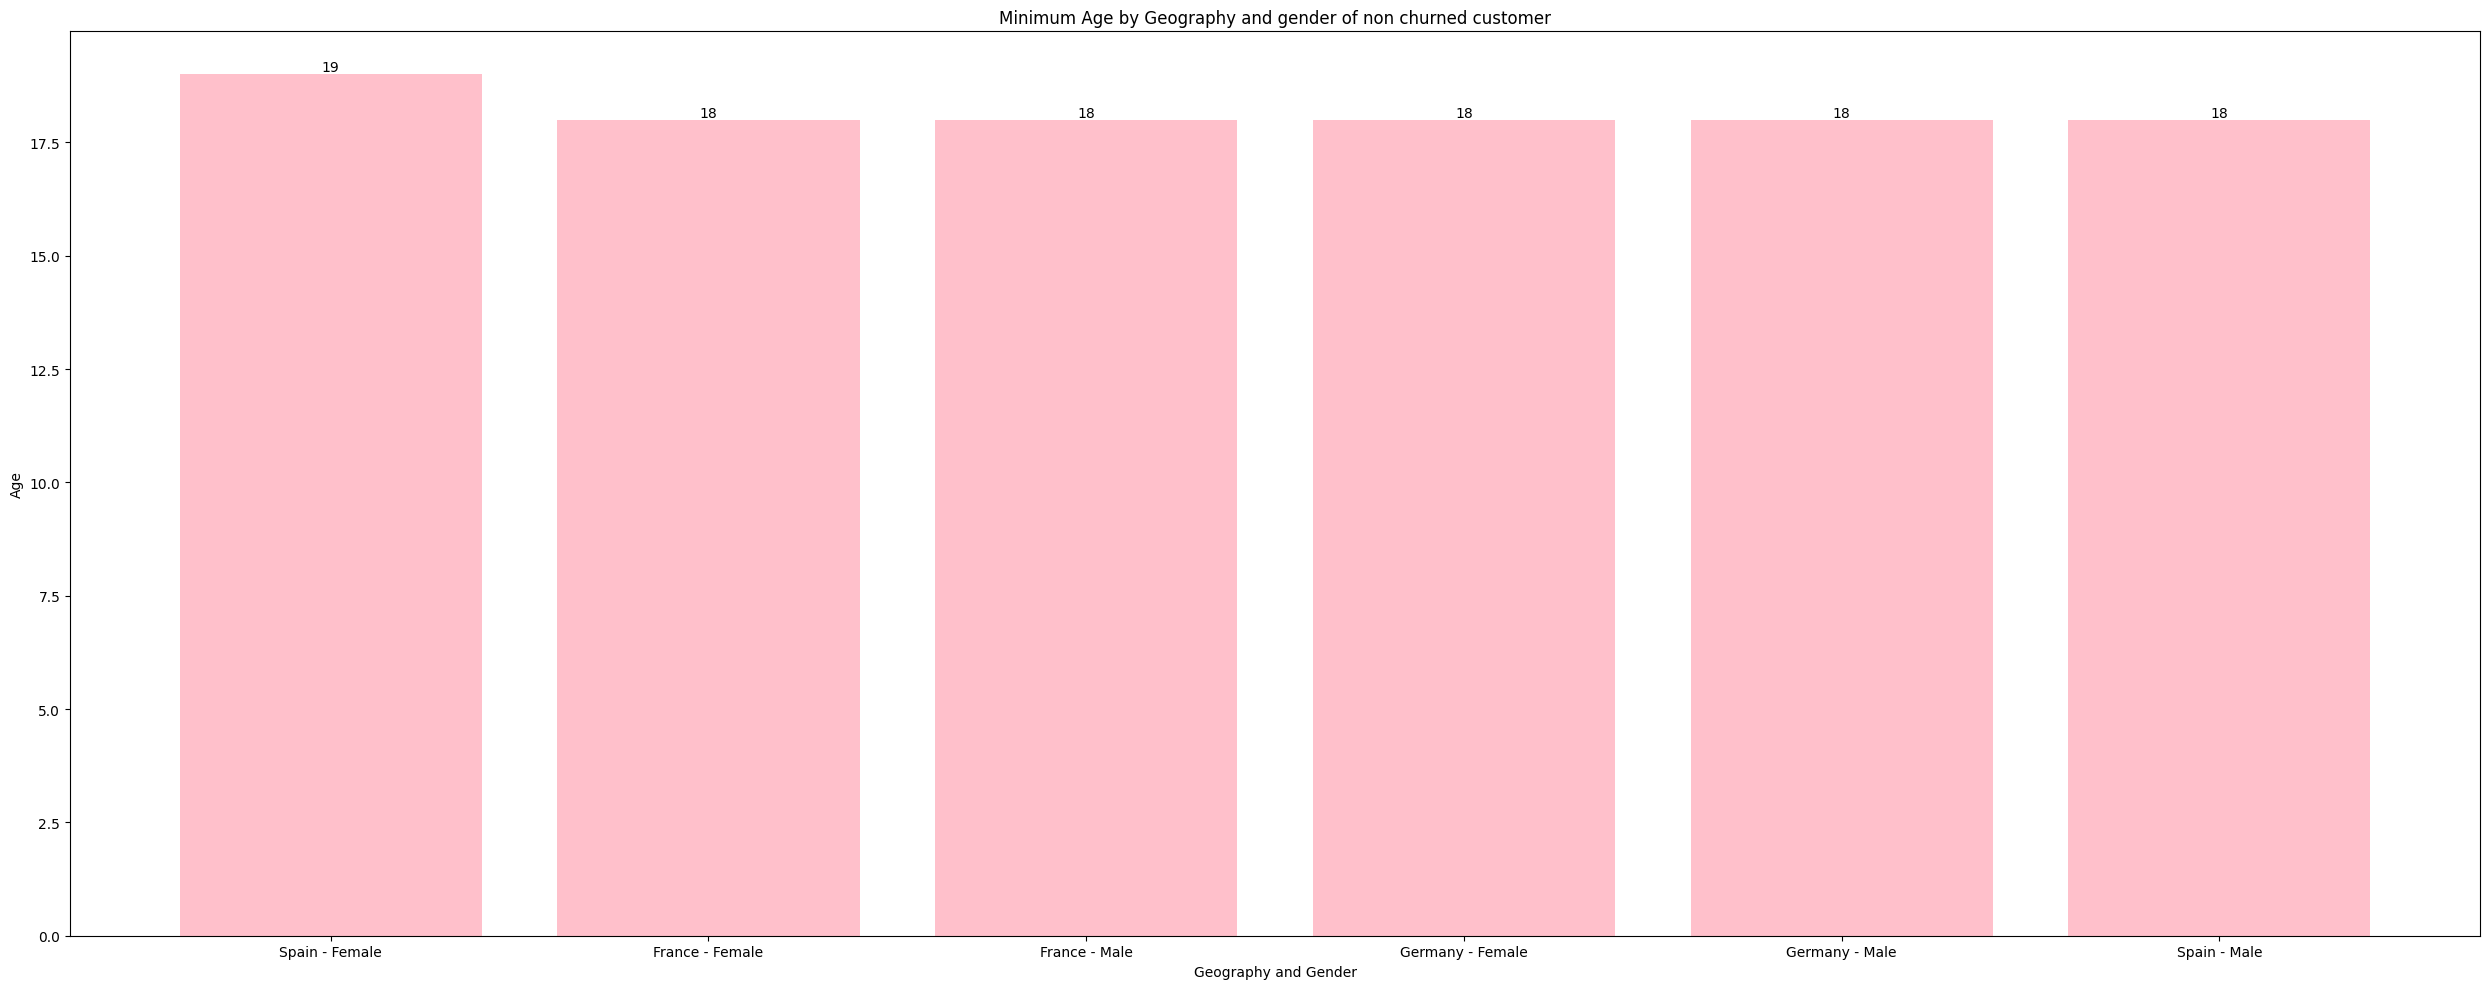

In [16]:
nmin_age=nonchurned_df.groupby(['Geography','Gender'])['Age'].min()
sorted_nmin_age=nmin_age.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar([f"{geo} - {gender}" for geo, gender in sorted_nmin_age.index], sorted_nmin_age.values, color='pink')
plt.xlabel('Geography and Gender')
plt.ylabel('Age')
plt.title('Minimum Age by Geography and gender of non churned customer')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the minimum Age for each Geograhy and gender
for i, age in enumerate(sorted_nmin_age):
    plt.text(i, age, f"{age}", ha='center', va='bottom', rotation=0)

plt.show()

### Creditscore, Tenure, Balance and estmated salary wrt target column as per geography and gender.

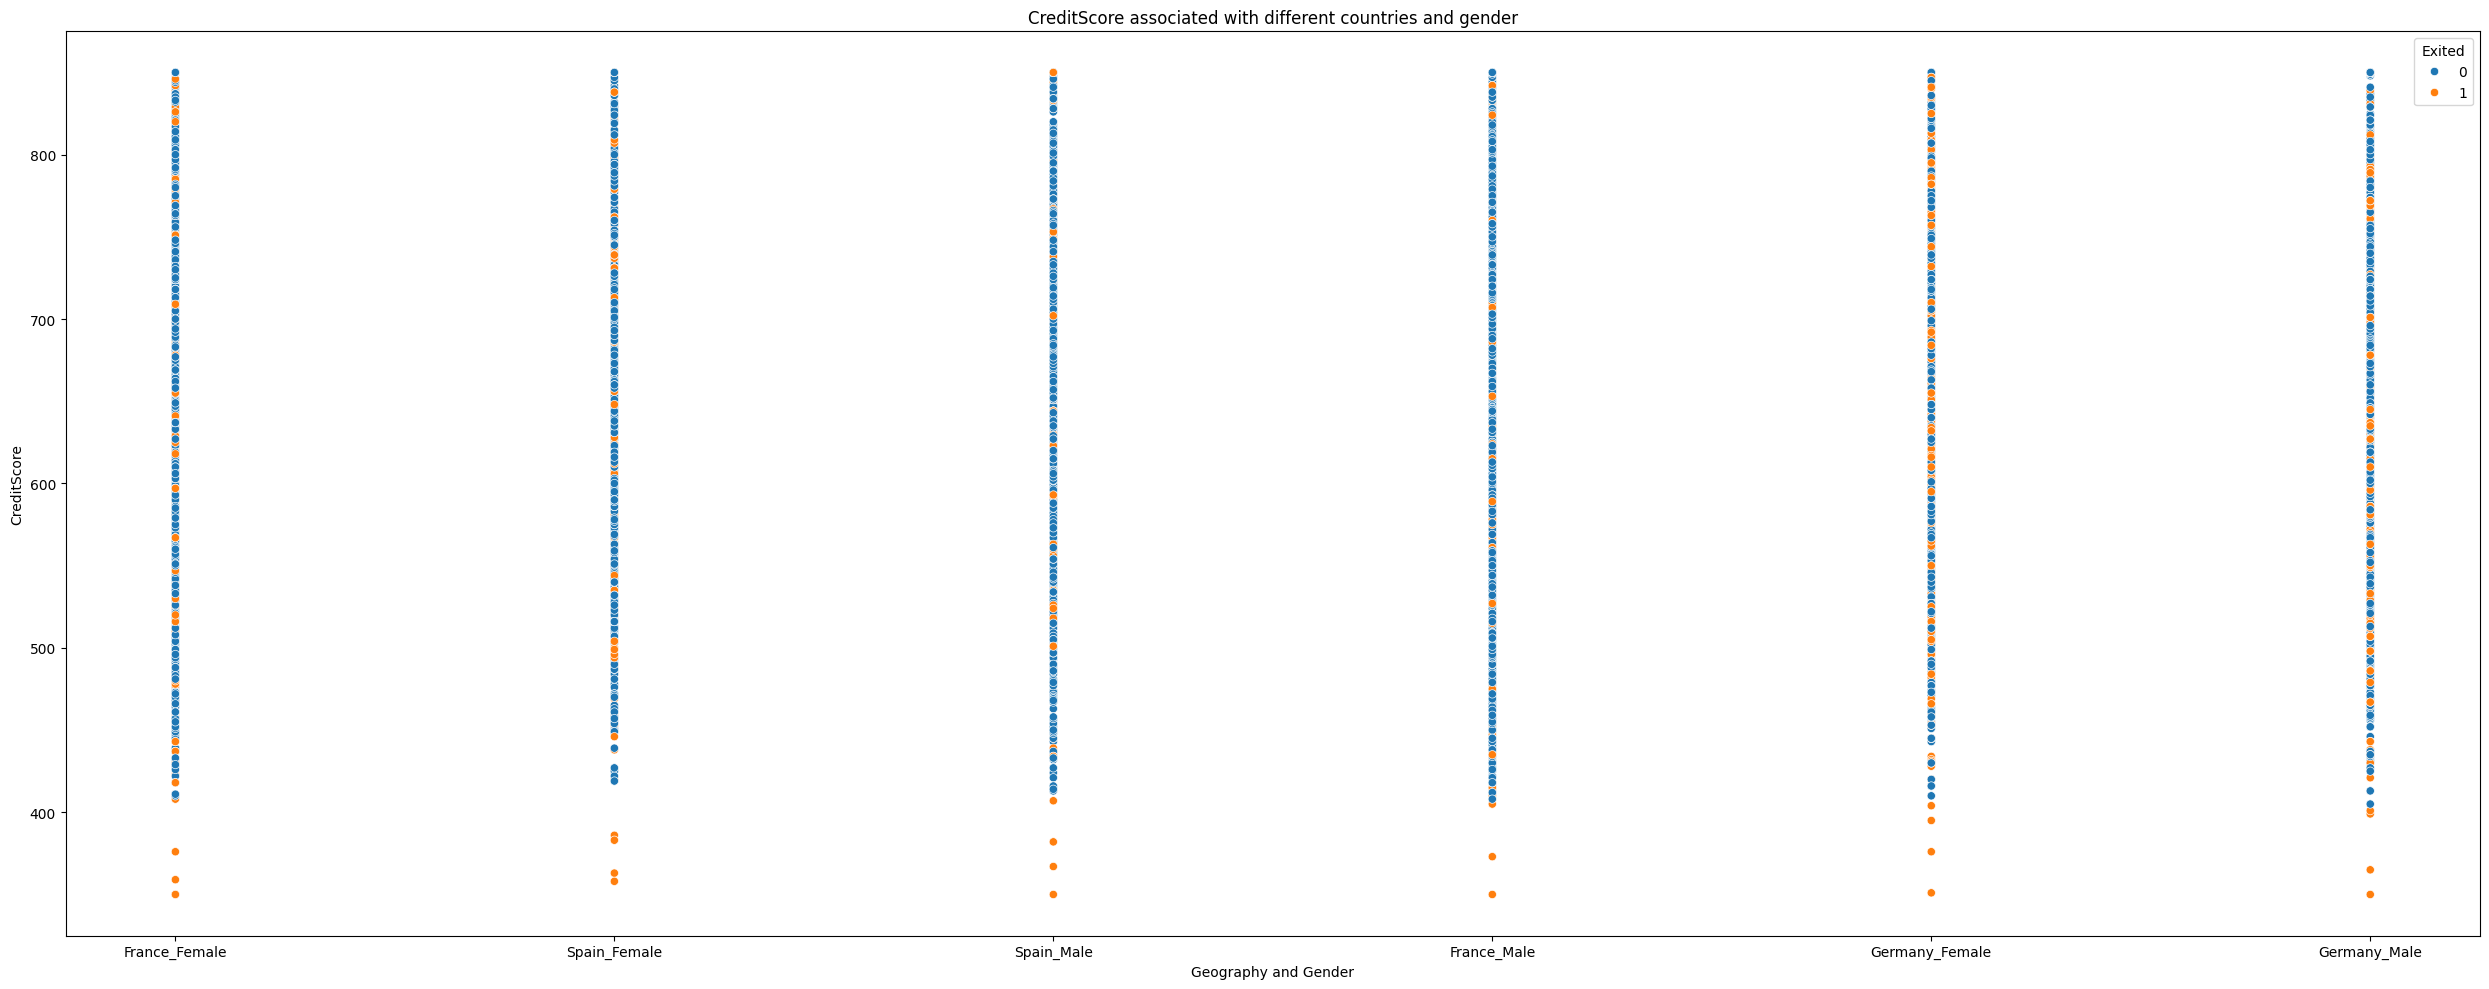

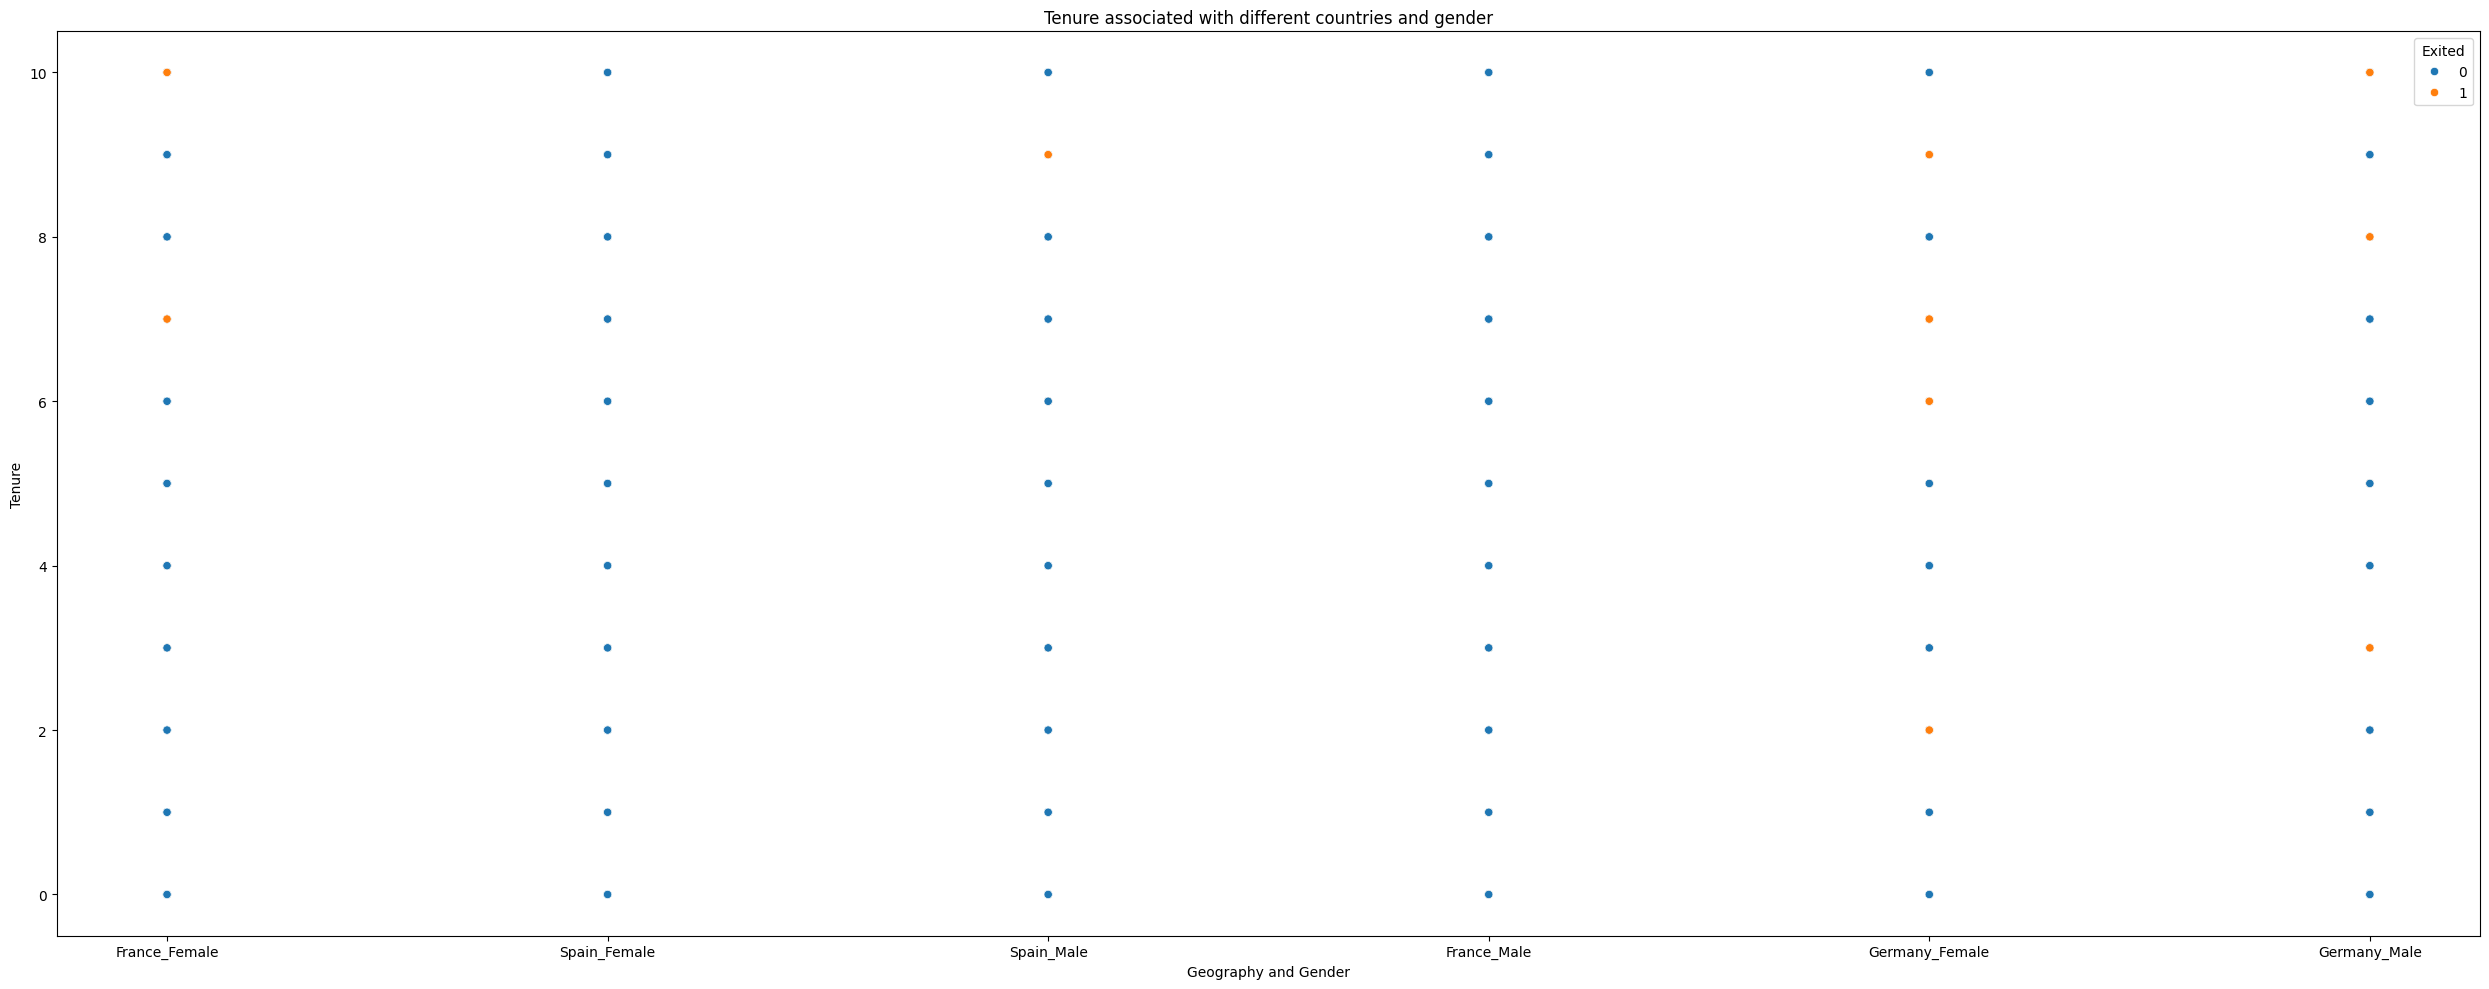

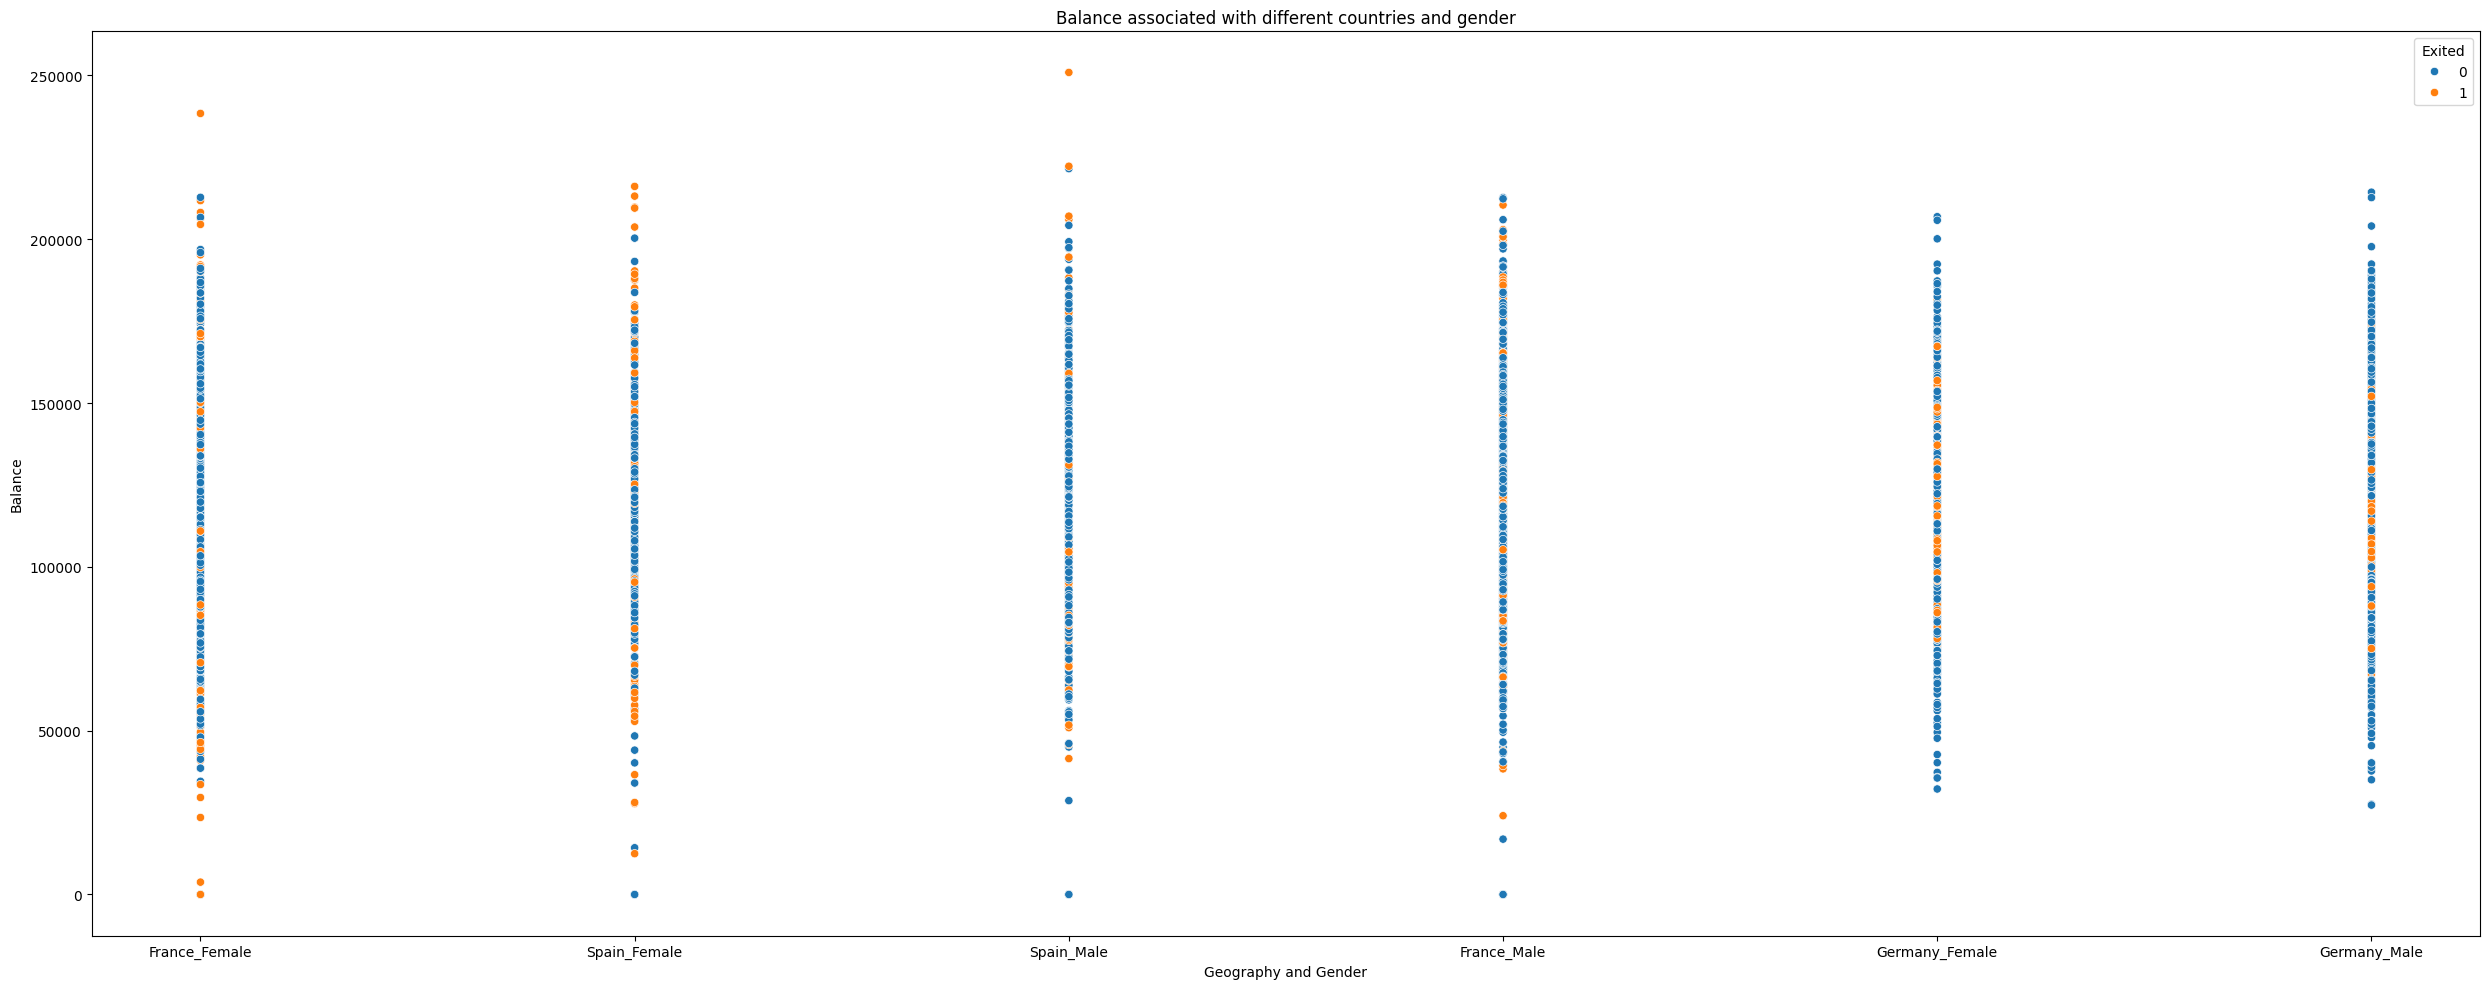

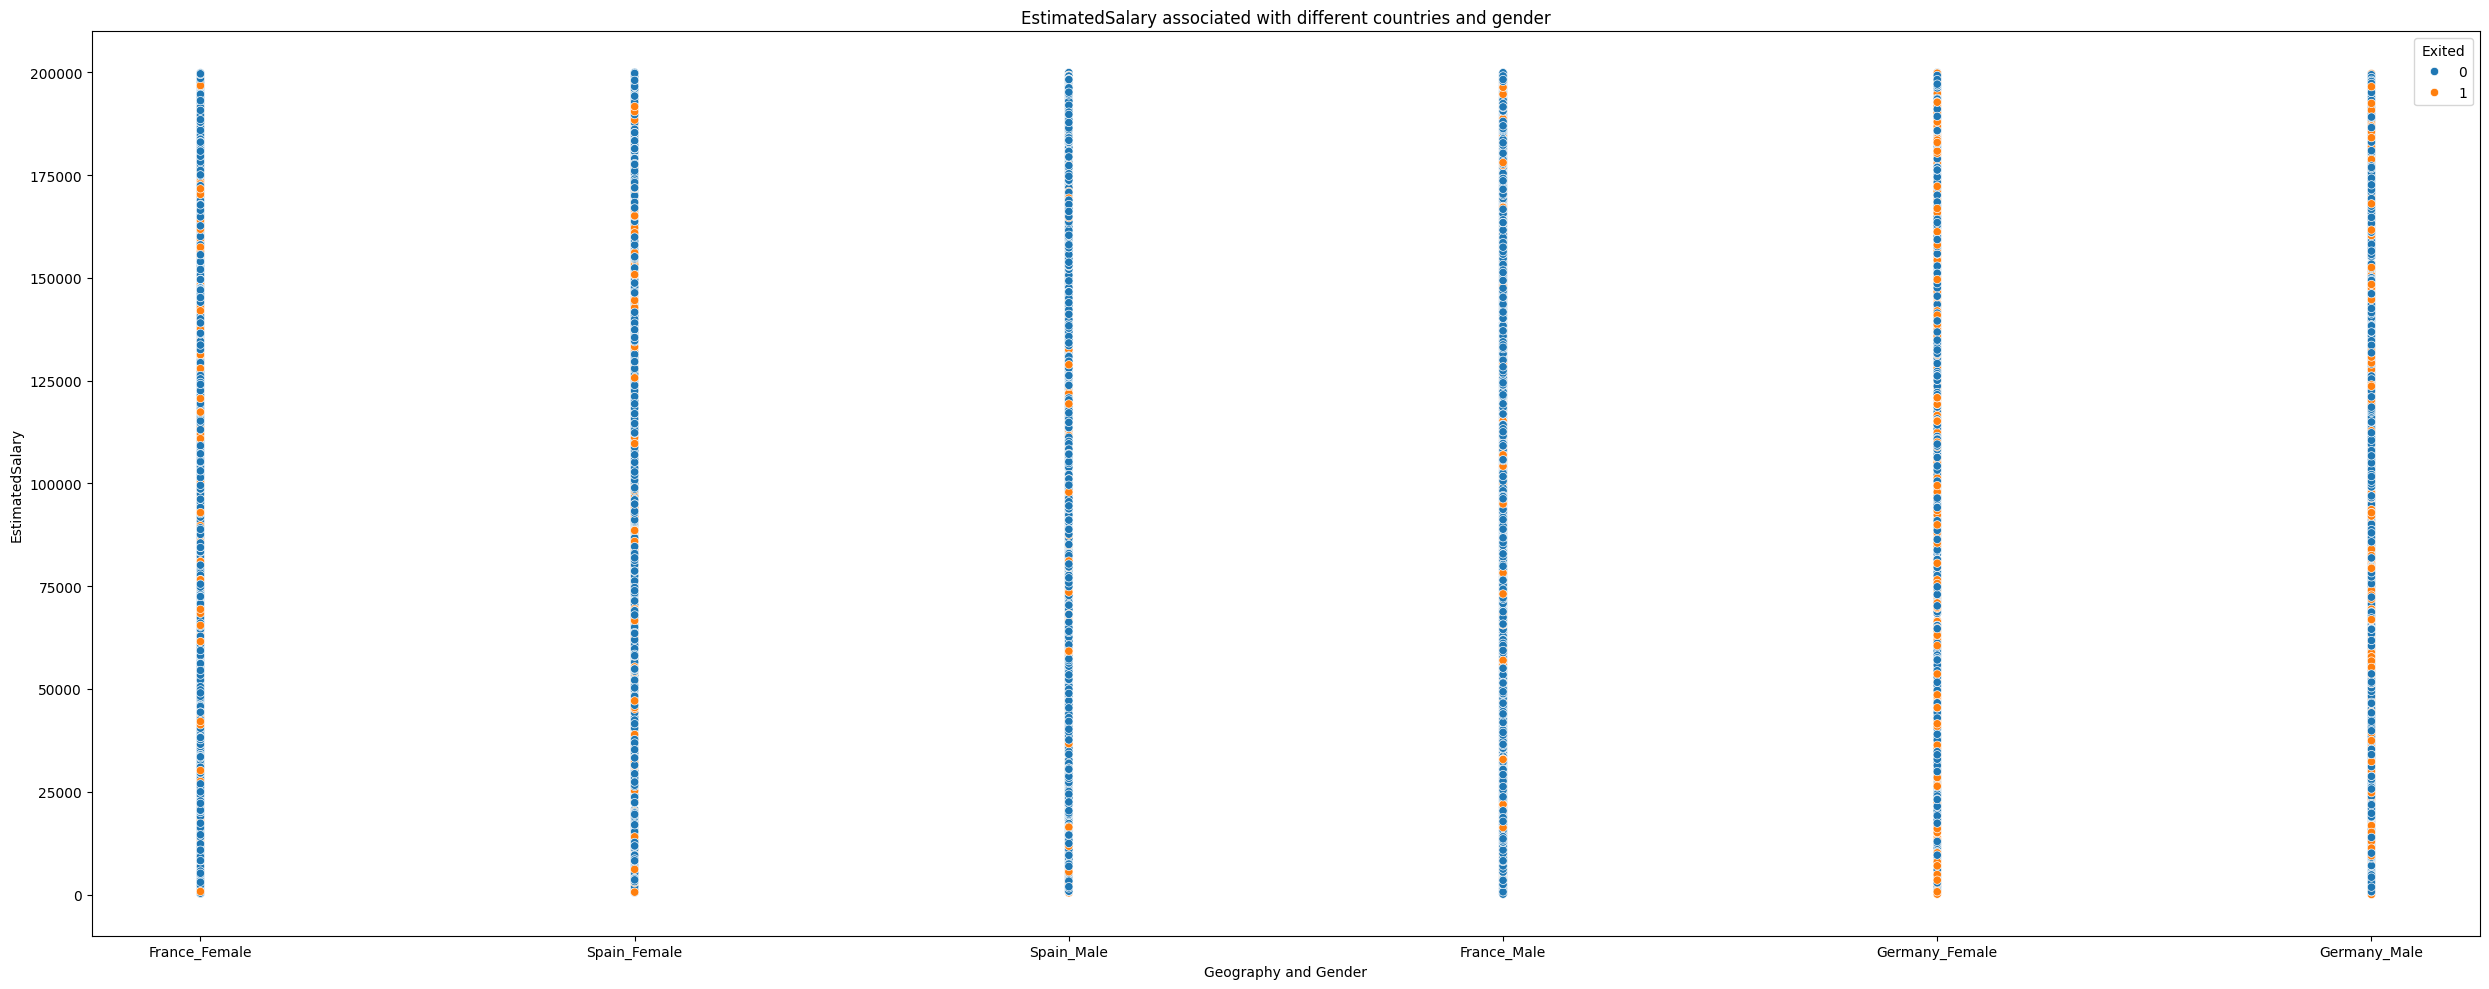

In [17]:
df['GeoGender'] = df['Geography'] + '_' + df['Gender']

for i in df.columns:
    if i in ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']:
        plt.figure(figsize=(25, 10))
        sns.scatterplot(data=df, x="GeoGender", y=i, hue='Exited')
        plt.xticks(rotation=0) 
        plt.title(f'{i} associated with different countries and gender')
        plt.xlabel('Geography and Gender')
        plt.ylabel(i)
        plt.tight_layout()
        plt.show()

### Total number of product as per Geogender and churn status.

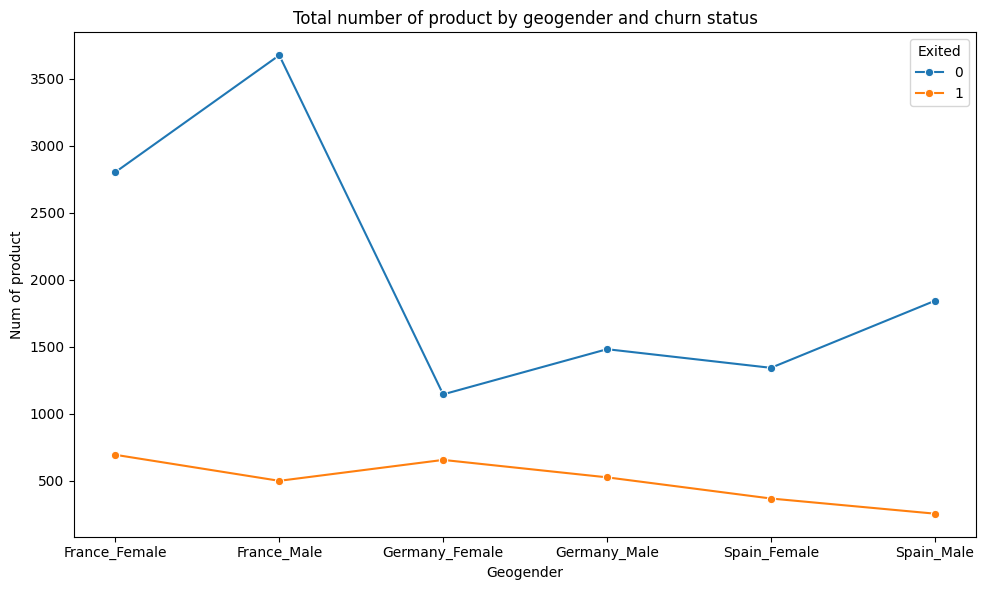

In [18]:
totalproduct=df.groupby(['GeoGender','Exited'])['NumOfProducts'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=totalproduct, x = 'GeoGender', y = 'NumOfProducts', hue='Exited', marker = 'o')
plt.xlabel('Geogender')
plt.ylabel('Num of product')
plt.title('Total number of product by geogender and churn status') 
plt.tight_layout()
plt.show()

### Total Credit Card Holder by geogender and churn status

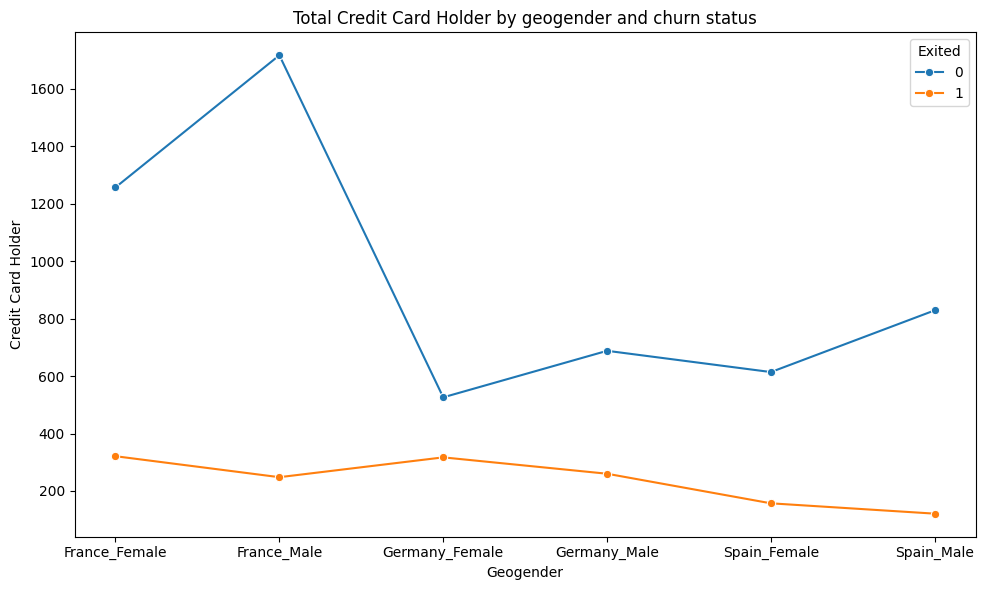

In [19]:
totalcrholder=df.groupby(['GeoGender','Exited'])['HasCrCard'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=totalcrholder, x = 'GeoGender', y = 'HasCrCard', hue='Exited', marker = 'o')
plt.xlabel('Geogender')
plt.ylabel('Credit Card Holder')
plt.title('Total Credit Card Holder by geogender and churn status') 
plt.tight_layout()
plt.show()

### Total active member by Geogender and churn status.

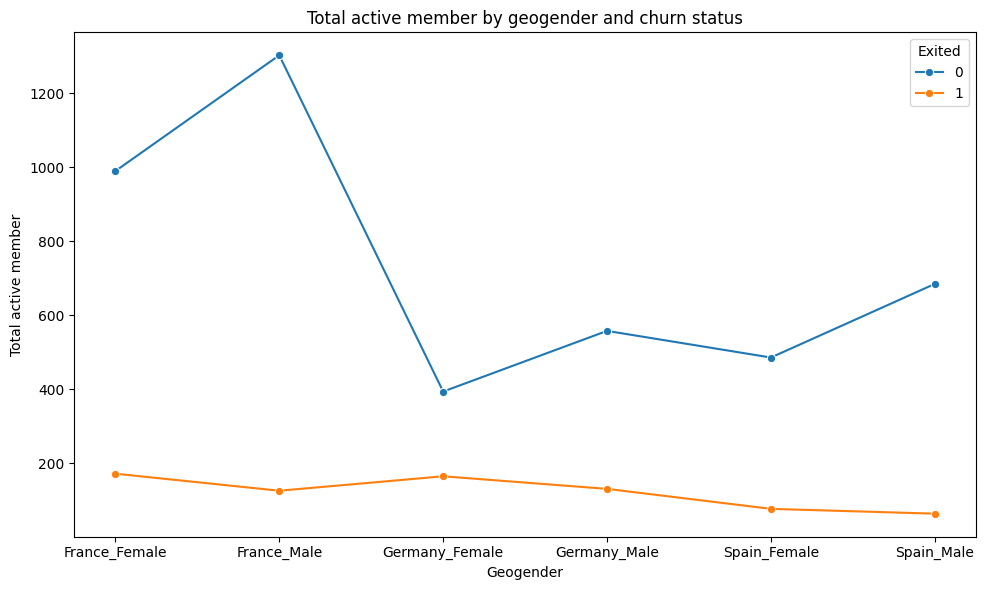

In [20]:
totalactivemember=df.groupby(['GeoGender','Exited'])['IsActiveMember'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=totalactivemember, x = 'GeoGender', y = 'IsActiveMember', hue='Exited', marker = 'o')
plt.xlabel('Geogender')
plt.ylabel('Total active member')
plt.title('Total active member by geogender and churn status') 
plt.tight_layout()
plt.show()

### Checking outlier.

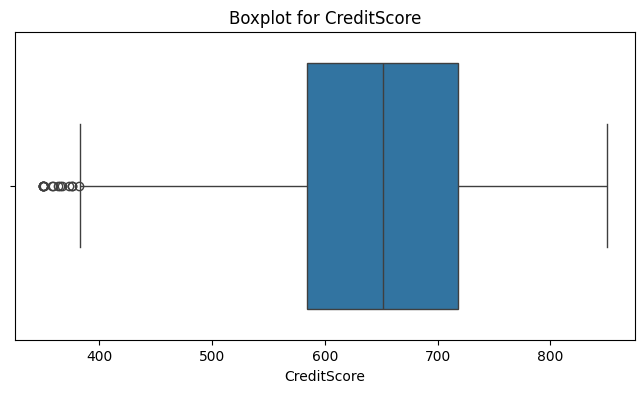

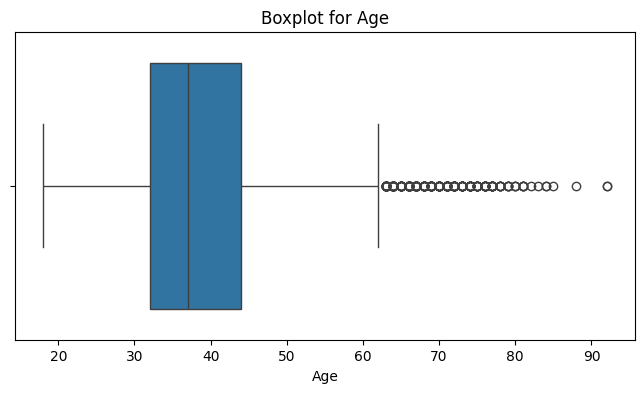

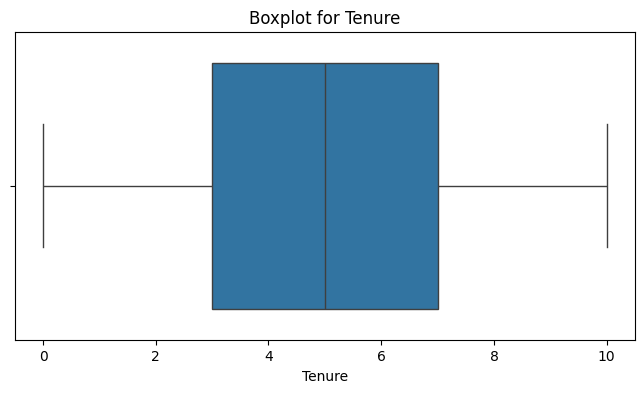

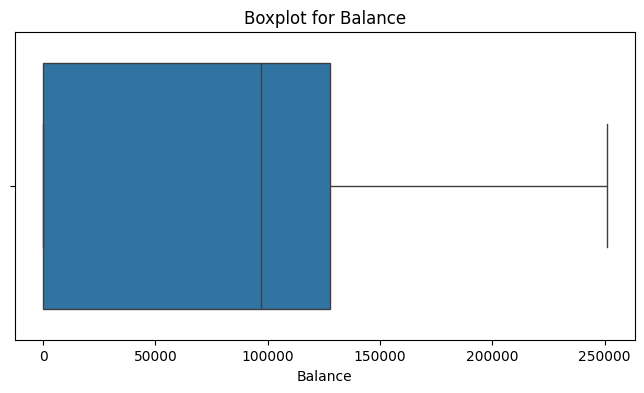

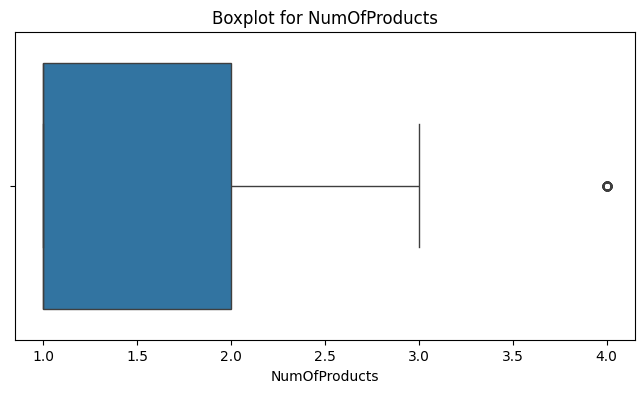

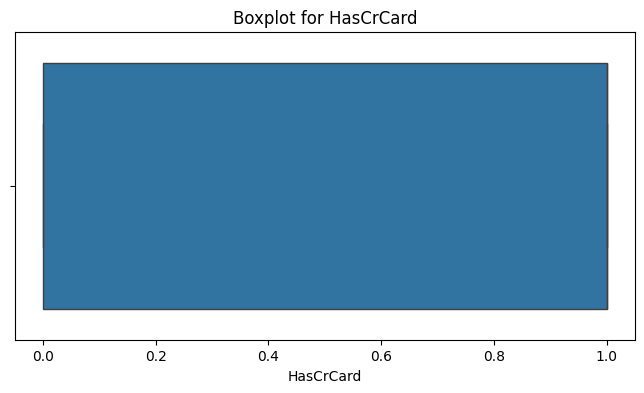

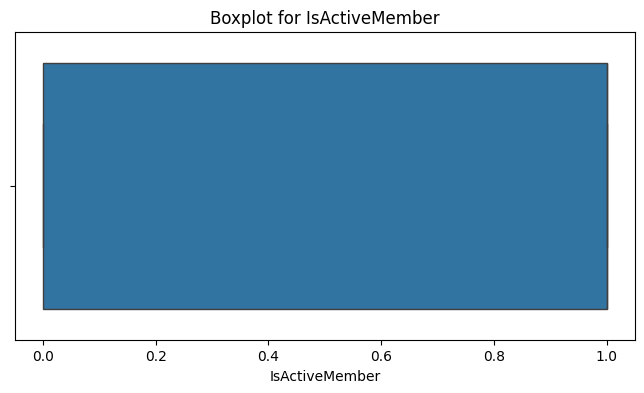

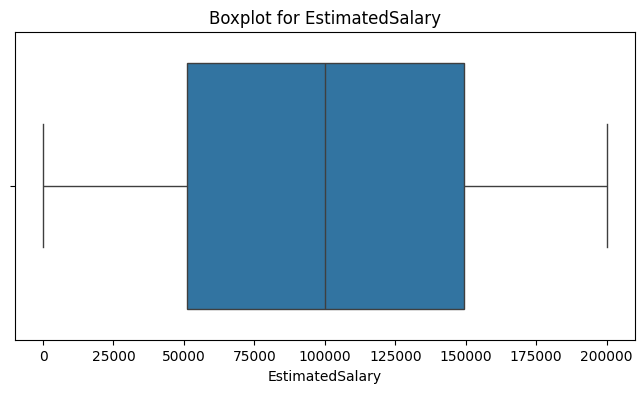

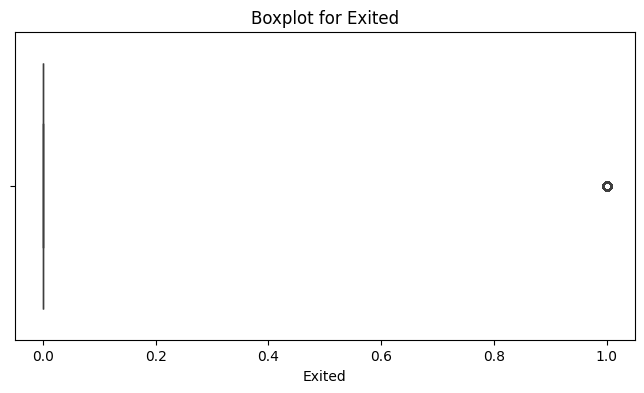

In [21]:
for i in df.columns:
    if i in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[i])
        plt.title(f'Boxplot for {i}')
        plt.show()

### Boxplot wrt target column.

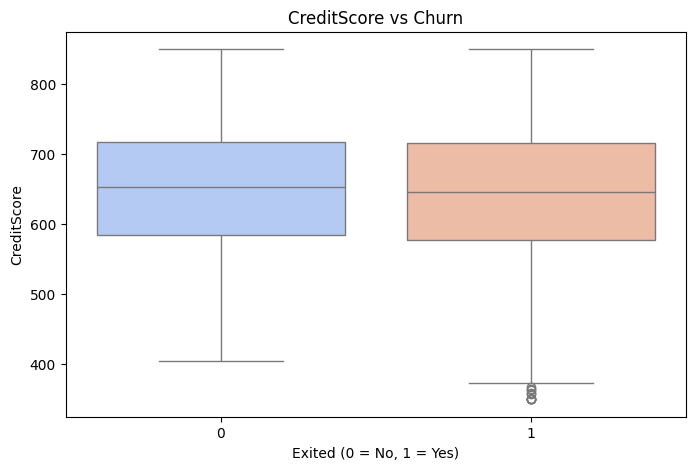

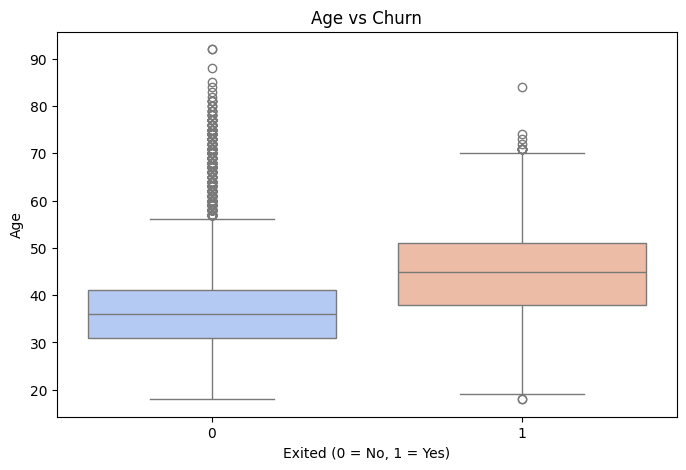

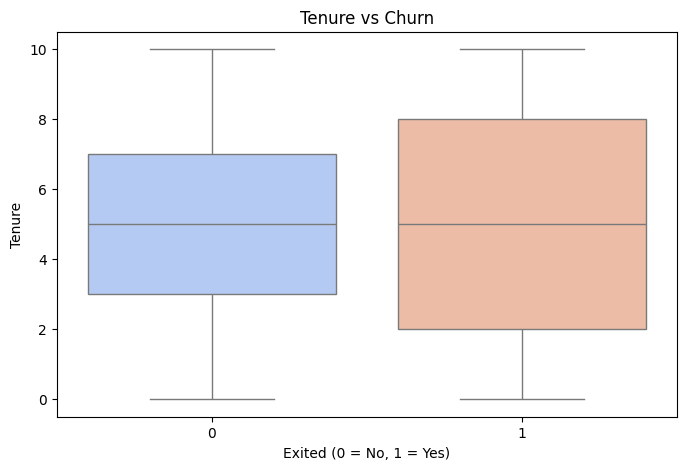

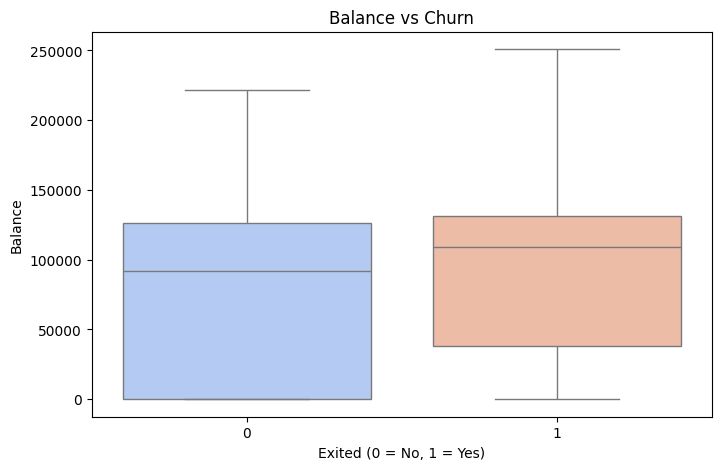

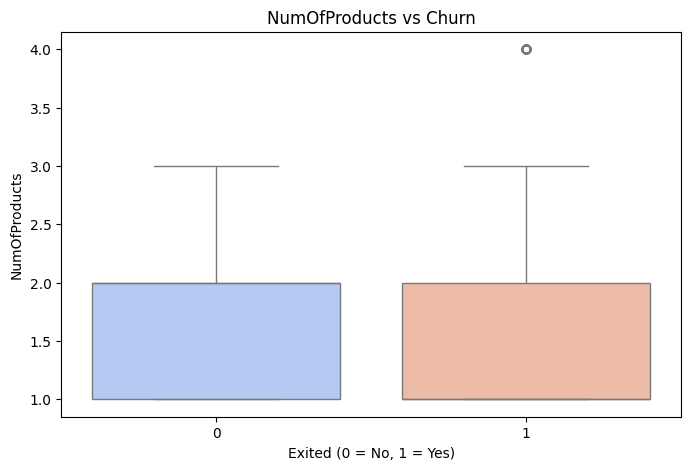

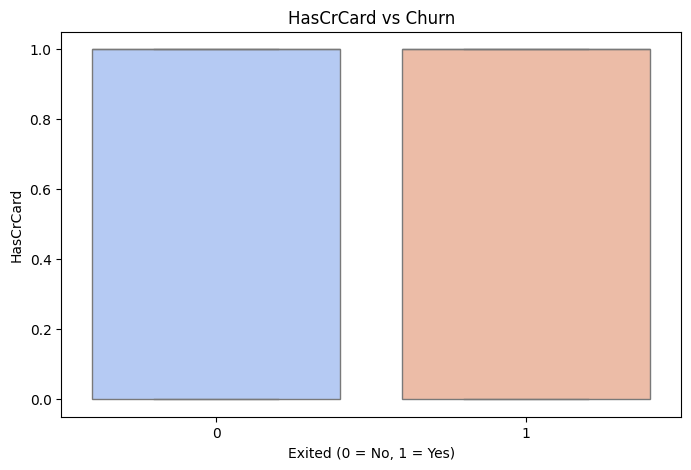

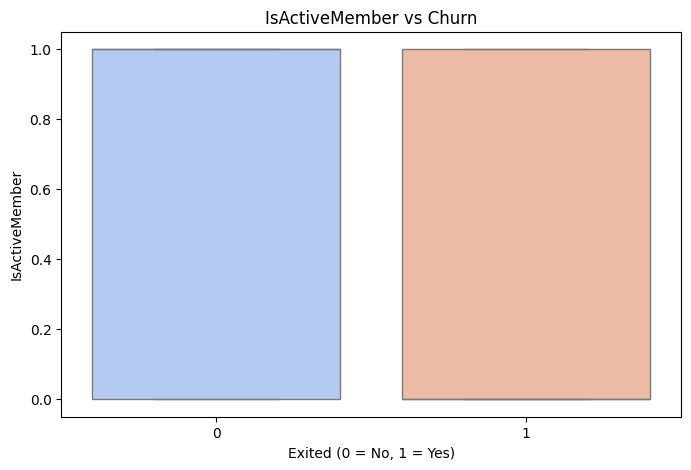

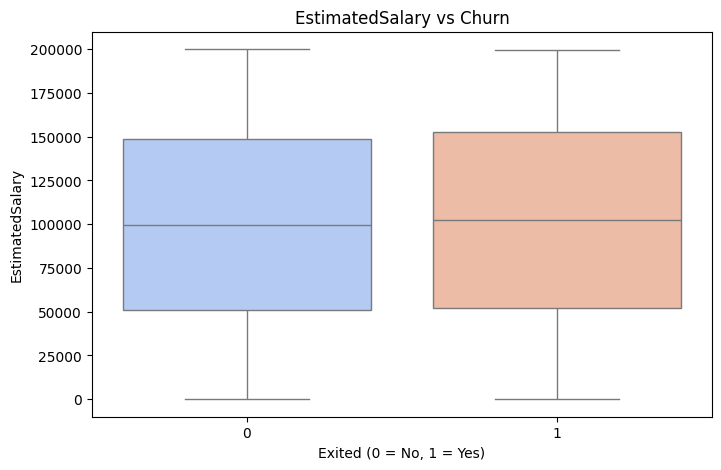

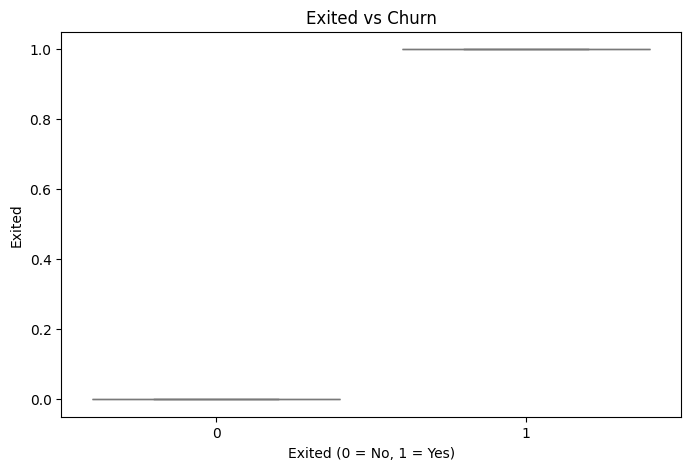

In [22]:
for i in df.columns:
    if i in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Exited', y=df[i], data=df, palette='coolwarm')
        plt.title(f'{i} vs Churn')
        plt.xlabel('Exited (0 = No, 1 = Yes)')
        plt.ylabel(i)
        plt.show()

### From above graph we can say that outlier present in age column and non churn customers.

### Ploting dist and KDE plot for age column for better visibility.

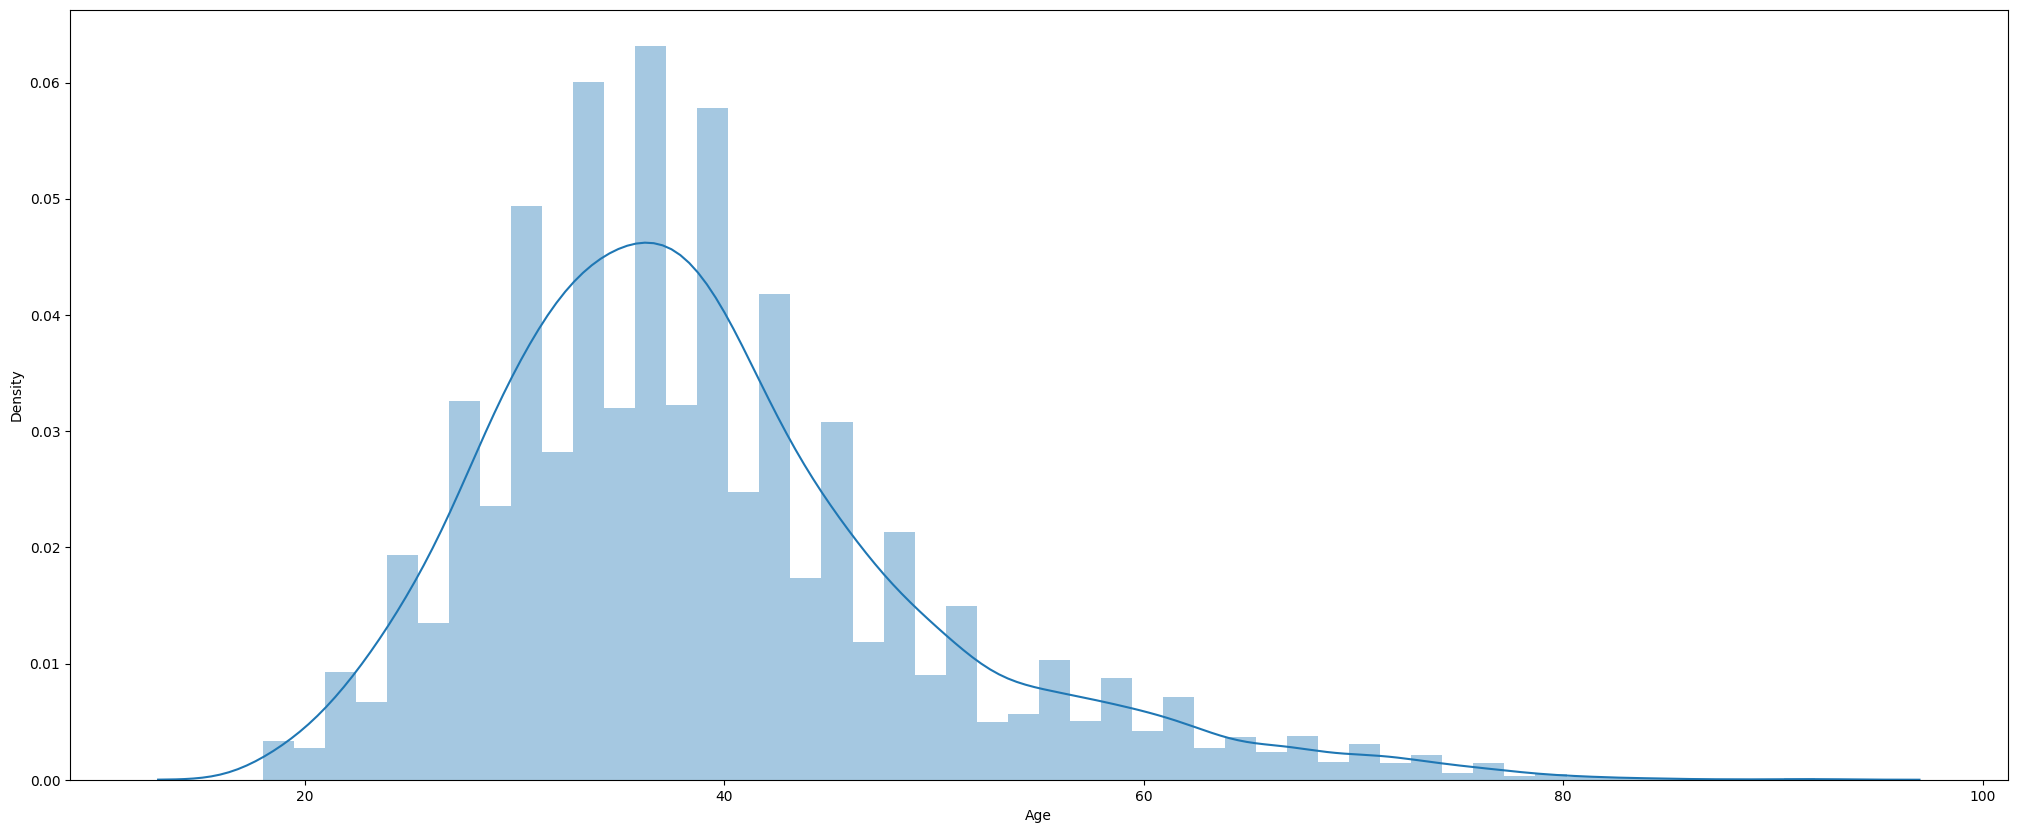

In [23]:
plt.figure(figsize=(25,10))
sns.distplot(df['Age'])
plt.show()

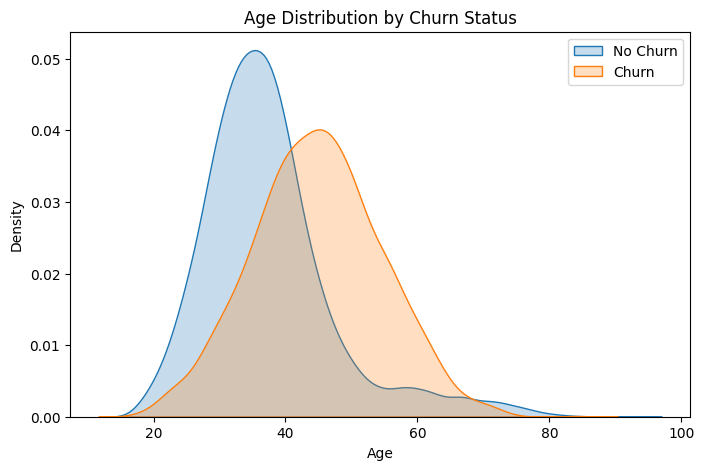

In [24]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Exited'] == 0]['Age'], label='No Churn', shade=True)
sns.kdeplot(data=df[df['Exited'] == 1]['Age'], label='Churn', shade=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Will drop the outlier present in age column and non churned customer.

In [25]:
indices_to_drop = df[(df['Exited'] == 0) & (df['Age'] > 60)].index

In [26]:
df.drop(indices_to_drop, inplace=True)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeoGender
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,France_Female
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Spain_Female
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,France_Female
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,France_Female
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Spain_Female


### We will check wheteher dataset is balance or not.

In [28]:
df['Exited'].value_counts()

Exited
0    7614
1    2037
Name: count, dtype: int64

### Dataset is imbalance. So balancing it using smote technique. 

In [29]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTENC

In [34]:
x = df.drop(['Exited','GeoGender'], axis=1)
y = df['Exited']

In [35]:
categorical_cols = ['Geography', 'Gender']
oe = OrdinalEncoder()
x[categorical_cols] = oe.fit_transform(x[categorical_cols])

In [36]:
cat_indices = [x.columns.get_loc(col) for col in categorical_cols]

In [37]:
sm = SMOTENC(categorical_features=cat_indices, random_state=1)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [38]:
x_resampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.000000,1,1,1,101348.880000
1,608,2.0,0.0,41,1,83807.860000,1,0,1,112542.580000
2,502,0.0,0.0,42,8,159660.800000,3,1,0,113931.570000
3,699,0.0,0.0,39,1,0.000000,2,0,0,93826.630000
4,850,2.0,0.0,43,2,125510.820000,1,1,1,79084.100000
...,...,...,...,...,...,...,...,...,...,...
15223,697,0.0,0.0,49,1,0.000000,3,1,0,88575.161931
15224,714,1.0,1.0,49,4,91155.331094,1,0,0,6886.543430
15225,650,1.0,1.0,46,3,122940.224020,1,1,0,26316.884967
15226,570,0.0,0.0,38,7,69510.975017,1,1,0,18799.180313


In [39]:
y_resampled

0        1
1        0
2        1
3        0
4        0
        ..
15223    1
15224    1
15225    1
15226    1
15227    1
Name: Exited, Length: 15228, dtype: int64

In [40]:
y_resampled.value_counts()

Exited
1    7614
0    7614
Name: count, dtype: int64

### The dataset is balance now.

### We will split the data and build the model.

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=1)

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### We will check accuracy for different classification model.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier

In [45]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))

In [46]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [47]:
mymodel(lr)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2286
           1       0.73      0.66      0.69      2283

    accuracy                           0.71      4569
   macro avg       0.71      0.71      0.71      4569
weighted avg       0.71      0.71      0.71      4569

[[1729  557]
 [ 786 1497]]


In [48]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2286
           1       0.65      0.74      0.69      2283

    accuracy                           0.67      4569
   macro avg       0.67      0.67      0.67      4569
weighted avg       0.67      0.67      0.67      4569

[[1360  926]
 [ 585 1698]]


In [49]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.62      0.40      0.49      2286
           1       0.56      0.75      0.64      2283

    accuracy                           0.58      4569
   macro avg       0.59      0.58      0.56      4569
weighted avg       0.59      0.58      0.56      4569

[[ 916 1370]
 [ 570 1713]]


In [50]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2286
           1       0.79      0.81      0.80      2283

    accuracy                           0.80      4569
   macro avg       0.80      0.80      0.80      4569
weighted avg       0.80      0.80      0.80      4569

[[1788  498]
 [ 438 1845]]


In [51]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2286
           1       0.86      0.86      0.86      2283

    accuracy                           0.86      4569
   macro avg       0.86      0.86      0.86      4569
weighted avg       0.86      0.86      0.86      4569

[[1970  316]
 [ 317 1966]]


In [52]:
mymodel(ad)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2286
           1       0.80      0.81      0.81      2283

    accuracy                           0.81      4569
   macro avg       0.81      0.81      0.81      4569
weighted avg       0.81      0.81      0.81      4569

[[1837  449]
 [ 438 1845]]


In [53]:
mymodel(gb)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2286
           1       0.84      0.84      0.84      2283

    accuracy                           0.84      4569
   macro avg       0.84      0.84      0.84      4569
weighted avg       0.84      0.84      0.84      4569

[[1930  356]
 [ 365 1918]]


In [54]:
mymodel(xgb)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2286
           1       0.86      0.86      0.86      2283

    accuracy                           0.86      4569
   macro avg       0.86      0.86      0.86      4569
weighted avg       0.86      0.86      0.86      4569

[[1963  323]
 [ 330 1953]]


### As Random forest and XGBoost classifier has given same accuracy we will hypertune the both model.

### Randomforest classifier.

In [55]:
for i in range(1,50):
    rf1=RandomForestClassifier(max_depth=i)
    rf1.fit(xtrain,ytrain)
    ypred=rf1.predict(xtest)
    print(i,"----",accuracy_score(ytest,ypred))

1 ---- 0.7465528562048588
2 ---- 0.790326110746334
3 ---- 0.7933902385642373
4 ---- 0.8154957321076822
5 ---- 0.8198730575618297
6 ---- 0.8268767782884657
7 ---- 0.8358502954694682
8 ---- 0.8365068942875903
9 ---- 0.8452615451958854
10 ---- 0.8443860801050558
11 ---- 0.8489822718319107
12 ---- 0.8505143357408623
13 ---- 0.8548916611950098
14 ---- 0.8529218647406435
15 ---- 0.8559859925585467
16 ---- 0.8546727949223025
17 ---- 0.8594878529218647
18 ---- 0.8603633180126943
19 ---- 0.8548916611950098
20 ---- 0.8557671262858394
21 ---- 0.8564237251039615
22 ---- 0.8603633180126943
23 ---- 0.8562048588312541
24 ---- 0.8546727949223025
25 ---- 0.857299190194791
26 ---- 0.8553293937404246
27 ---- 0.8524841321952287
28 ---- 0.855548260013132
29 ---- 0.857299190194791
30 ---- 0.8568614576493763
31 ---- 0.8592689866491574
32 ---- 0.8529218647406435
33 ---- 0.8566425913766689
34 ---- 0.8601444517399869
35 ---- 0.8559859925585467
36 ---- 0.8559859925585467
37 ---- 0.8548916611950098
38 ---- 0.8570

In [56]:
for i in range(1,50):
    rf2=RandomForestClassifier(min_samples_leaf=i)
    rf2.fit(xtrain,ytrain)
    ypred=rf2.predict(xtest)
    print(i,"----",accuracy_score(ytest,ypred))

1 ---- 0.8564237251039615
2 ---- 0.8553293937404246
3 ---- 0.8529218647406435
4 ---- 0.8496388706500329
5 ---- 0.8478879404683738
6 ---- 0.8435106150142263
7 ---- 0.845042678923178
8 ---- 0.8426351499233968
9 ---- 0.8463558765594222
10 ---- 0.84154081855986
11 ---- 0.8393521558327862
12 ---- 0.8367257605602977
13 ---- 0.8345370978332239
14 ---- 0.8362880280148829
15 ---- 0.8343182315605165
16 ---- 0.8347559641059312
17 ---- 0.8295031735609543
18 ---- 0.8340993652878091
19 ---- 0.8319107025607354
20 ---- 0.8270956445611731
21 ---- 0.8297220398336617
22 ---- 0.8310352374699059
23 ---- 0.826439045743051
24 ---- 0.8266579120157583
25 ---- 0.8266579120157583
26 ---- 0.8268767782884657
27 ---- 0.8290654410155395
28 ---- 0.8290654410155395
29 ---- 0.8253447143795141
30 ---- 0.8233749179251477
31 ---- 0.8227183191070256
32 ---- 0.8203107901072445
33 ---- 0.8244692492886846
34 ---- 0.8240315167432699
35 ---- 0.8279711096520026
36 ---- 0.8216239877434888
37 ---- 0.8209673889253666
38 ---- 0.8235

In [57]:
for i in range(2,50):
    rf3=RandomForestClassifier(min_samples_split=i)
    rf3.fit(xtrain,ytrain)
    ypred=rf3.predict(xtest)
    print(i,"----",accuracy_score(ytest,ypred))

2 ---- 0.8557671262858394
3 ---- 0.8577369227402057
4 ---- 0.8533595972860583
5 ---- 0.857299190194791
6 ---- 0.8533595972860583
7 ---- 0.8535784635587655
8 ---- 0.8551105274677172
9 ---- 0.8516086671043992
10 ---- 0.8533595972860583
11 ---- 0.8575180564674983
12 ---- 0.8535784635587655
13 ---- 0.8500766031954475
14 ---- 0.8542350623768877
15 ---- 0.8531407310133509
16 ---- 0.8522652659225214
17 ---- 0.852046399649814
18 ---- 0.8500766031954475
19 ---- 0.8498577369227402
20 ---- 0.8494200043773255
21 ---- 0.8489822718319107
22 ---- 0.8500766031954475
23 ---- 0.8478879404683738
24 ---- 0.8476690741956664
25 ---- 0.8476690741956664
26 ---- 0.8474502079229591
27 ---- 0.8496388706500329
28 ---- 0.8452615451958854
29 ---- 0.8476690741956664
30 ---- 0.8432917487415189
31 ---- 0.8459181440140074
32 ---- 0.8481068067410812
33 ---- 0.8459181440140074
34 ---- 0.8465747428321295
35 ---- 0.8452615451958854
36 ---- 0.8432917487415189
37 ---- 0.8428540161961042
38 ---- 0.8432917487415189
39 ---- 0.8

In [58]:
rf4=RandomForestClassifier(max_depth=22,min_samples_leaf=1,min_samples_split=2)
mymodel(rf4)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2286
           1       0.85      0.86      0.85      2283

    accuracy                           0.85      4569
   macro avg       0.85      0.85      0.85      4569
weighted avg       0.85      0.85      0.85      4569

[[1944  342]
 [ 331 1952]]


### XGBoost classifier.

In [59]:
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=25, scoring='accuracy', cv=3, verbose=1, random_state=1, n_jobs=-1)


In [60]:
random_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 150, 200, 250],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=1, scoring='accuracy', verbose=1)

In [61]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [62]:
best_model = random_search.best_estimator_
ypred=best_model.predict(xtest)

In [63]:
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2286
           1       0.86      0.86      0.86      2283

    accuracy                           0.86      4569
   macro avg       0.86      0.86      0.86      4569
weighted avg       0.86      0.86      0.86      4569

[[1978  308]
 [ 314 1969]]


### After checking the hyperparameter tuner accuracy decreases by 1 percent for RandomForest and remain same for XGBoost.
### Hence will choose XGBoost Classifier.

### Best accuracy by XGBoost classifier is 86%

### We will check the prediction of model

In [67]:
a=int(input("enter the value of Geography "))                      # range (0-2)
b= int(input("enter the value of Gender "))                        # range (0-1)
c=float(input("enter the value of creditscore "))                  # range (350-850)
d=int(input("enter the value of Age "))                            # range (18-92)
e=int(input("enter the value of tenure "))                         # range (0-10)
f=float(input("enter the value of Balance "))                      # range (3768-250898)
g=int(input("enter the value of number of product "))              # range (1-4)
h=int(input("enter the value of hascrcard "))                      # range (0-1)
i=int(input("enter the value of isactivemember "))                 # range (0-1)
j=float(input("enter the value of estmsted salary "))              # range (11-200000)


m=best_model.predict([[a,b,c,d,e,f,g,h,i,j]])[0]
print("The new customer will classify in ",m,"Class")   

enter the value of Geography  1
enter the value of Gender  1
enter the value of creditscore  452
enter the value of Age  32
enter the value of tenure  6
enter the value of Balance  75852
enter the value of number of product  2
enter the value of hascrcard  1
enter the value of isactivemember  1
enter the value of estmsted salary  25552


The new customer will classify in  0 Class


## The customer will not quit the service of the bank on above condition.

### Making Web Application

In [64]:
import pickle

In [65]:
pickle.dump(oe , open("ordinal_encoder.pkl" , "wb"))

In [66]:
pickle.dump(best_model, open("best_model.pkl", "wb"))